# Исследование объявлений о продаже квартир


### Описание проекта

<p></p>

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

    
***Цели Исследования:***

Можно выделить несколько основных целей:

- ознакомиться с данными и выполнить их предобработку 
- оценить качество данных, проверить на аномалии и выбросы
- изучить параметры у объектов, их особенности и закономерности
- выяснить скорость продажи квартир
- выявить факторы, влияющие на рыночную стоимость квартиры сильнее всего
- изучить влияние расположения квартиры на стоимость 1кв.м и количество объявлений
- отдельно изучить объекты недвижимости в г.Санкт-Петербург, определив влияние близости центра на стоимость объекта
- зафиксировать основной вывод исследования и предоставить общие рекомендации

### Описание данных: 

<p></p>
<div style="border:solid black 1px; padding: 20px">Предоставлены данные по объектам недвижимости - квартирам - в Санкт-Петербурге и области. По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Всего 23 699 объекта недвижимости. Каждый объект недвижимости описан 22 признаками, из них 17 - количественные, 4 - категориальные, 1 - временной. Данные предоставлены за период с 2014 по 2019гг.</div>

</div>

## Импорт данных и изучение общей информации

In [1]:
# импорт библиотек pandas, numpy, matplotlib, sns
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt;
import seaborn as sns;

In [2]:
# # чтение csv-файла
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


*Предварительно оценив данные, можно уже сейчас отметить, что в столбцах ceiling_height, living_area, is_apartment, kitchen_area, balcony, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition есть пропуски. Достаточное большое количество столбцов, нужно изучить какую долю от общего количества строк занимают пропуски, обработать их и понять причины их появления. В столбце first_day_exposition следует поменять тип данных на datetime для дальнейшего исследования.*

In [3]:
# знакомство с именами колонок
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

*Следует изменить название у колонок, привести к единому стилю, а также, чтобы они были визуально понятнее, добавим единицы измерения. Перепишем их, как ceiling_height_m, airports_nearest_m, city_сenter_m, parks_around_3km, ponds_around_3km, parks_nearest_m, ponds_nearest_m.*

In [4]:
# вывод основной информации о датафрейме
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

*В столбцах ceiling_height, floors_total, living_area, is_apartment, kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition **пропущены значения**. Около 63.6% столбцов имеют пропуски. Их следует обработать: удалить, заполнить фиксированным значением или разделить на логические группы и подобрать фиксированные значения.
В некоторых колонках **некорректный тип данных**. У столбцов last_price, floors_total, balcony, parks_around3000, ponds_around3000, days_exposition изменим тип данных на int. А в столбце first_day_exposition - на datetime.
**Названия столбцов** также следует обработать.*

In [5]:
# вывод важных описательных статистических параметров датафрейма
data.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,23699.0,9.858475e+00,5.682529e+00,0.0,6.00,9.00,14.0,50.0
last_price,23699.0,6.541549e+06,1.088701e+07,12190.0,3400000.00,4650000.00,6800000.0,763000000.0
total_area,23699.0,6.034865e+01,3.565408e+01,12.0,40.00,52.00,69.9,900.0
rooms,23699.0,2.070636e+00,1.078405e+00,0.0,1.00,2.00,3.0,19.0
ceiling_height,14504.0,2.771499e+00,1.261056e+00,1.0,2.52,2.65,2.8,100.0
floors_total,23613.0,1.067382e+01,6.597173e+00,1.0,5.00,9.00,16.0,60.0
living_area,21796.0,3.445785e+01,2.203045e+01,2.0,18.60,30.00,42.3,409.7
floor,23699.0,5.892358e+00,4.885249e+00,1.0,2.00,4.00,8.0,33.0
kitchen_area,21421.0,1.056981e+01,5.905438e+00,1.3,7.00,9.10,12.0,112.0
balcony,12180.0,1.150082e+00,1.071300e+00,0.0,0.00,1.00,2.0,5.0


*Данные еще не очищены и не отфильтрованы. Сделаем предварительную оценку.*  
*Можем отметить, что в столбцах living_area и ceiling_height есть аномальные значения. Высота потолка маловероятно может быть 1м. или 100м. А жилая площадь 2кв.м. звучит неправдоподобно, так как в соответствии с Жилищным кодексом РФ, размер жилой площади, приходящейся на одного человека, не может быть меньше 12 квадратных метров.*   
*В колонке last_price отметим большой размах значений: минимальная цена - 12190.0руб., максимальная цена - 763 000 000руб. Скорее всего это выбросы.*   
*Аналогично в столбце total_area есть выбросы, площадь квартиры 900кв.м. является выбросом, так как это значение лежит аномально далеко от других наблюдений и медианного значения.*  
*Уже сейчас следует отметить, что в данных есть, как минимум, два наблюдения, которые можно считать выбросами - квартира с аномально низкими стоимостью и площадью (12190.0руб. и 12.0кв.м соответственно) и квартира с максимальными значениями в данных категориях - 763 000 000руб. и 900кв.м. соответственно.*
*Нулевое значение в колонке rooms скорее всего говорит о том, что эта квартира является студией, это следует проверить.*

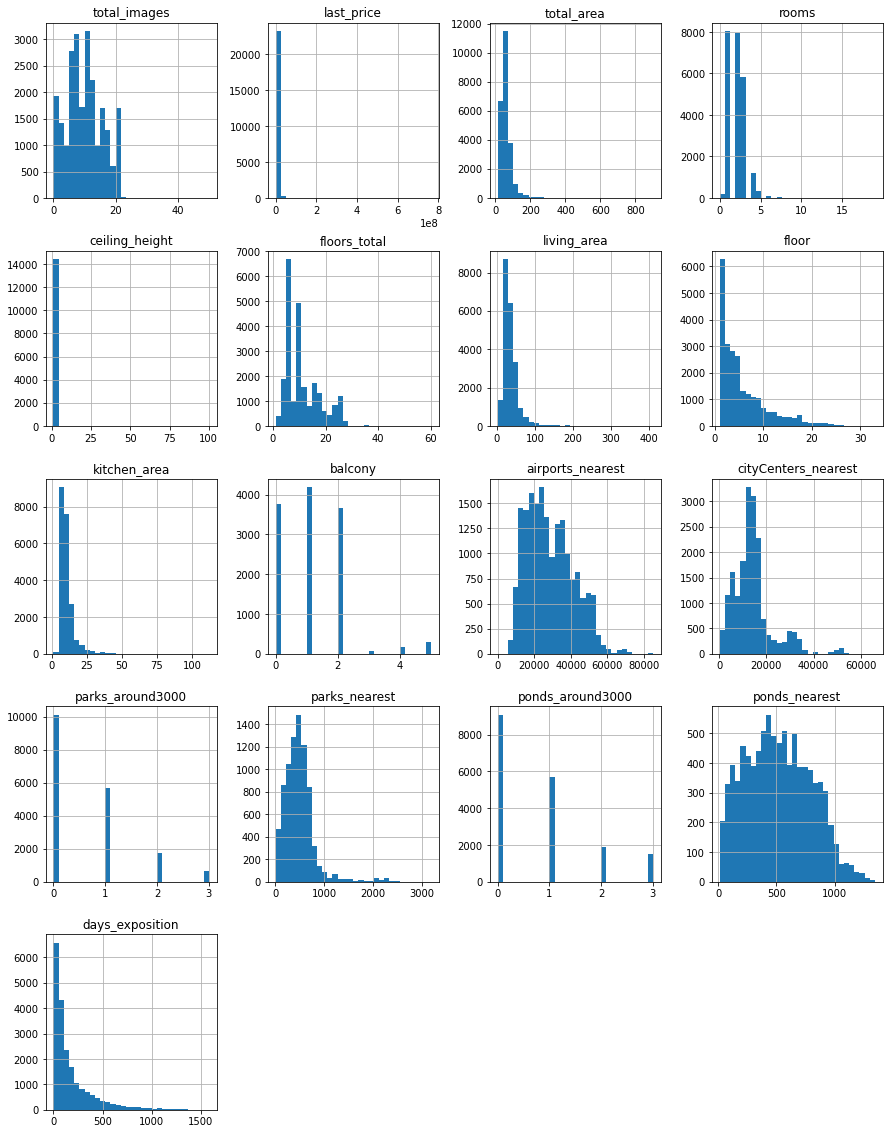

In [6]:
# построение общих гистограмм для всех столбцов
data.hist(bins=30, figsize=(15, 20))
plt.show()

*Предварительно ознакомясь с диаграммами отметим, что только график столбца ponds_nearest больше всех приближен к нормальному распределению.*  
*График колонки days_exposition похож на распределение Пуассона. Основная доля объявлений была размещена менее 100 дней. То есть около 3 месяцев. Чаще всего объявление находилось на сайте около 45 дней, на втором месте - 60 дней.*  
*Столбцы balcony, cityCenters_nearest, parks_nearest имеют выбросы, так как на график можно увидеть значения, которые отделены от основного числа наблюдений.*  
*График total_images говорит о том, что основная доля объявлений имеют или 10, или 20 фотографий квартир. Эти значения встречаются на графике чаще всего.*  
*Наибольшее число квартир с площадью 50кв.м и двумя комнатами, это видно из гистограммы total_area и rooms.*  
*Чаще всего встречались объявления о продаже квартир с 1 по 5 этажи, 2 этаж - самый частотный. Это может говорить о том, что чаще всего продавали квартиры, находящиеся в 5-этажных домах.*  
*Прежде чем приступать к исследовательскому анализу данных, данные следует предобработать, очистить от дубликатов, устранить пропуски, выявить причины их возникновения. Это позволит сделать более точным наш анализ и снизить значение статистической ошибки.*

### Вывод: 

<p></p>

<div style="border:solid pink 5px; padding: 20px">
<li>Датасет содержит данные по 23699 объектам недвижимости. Каждая единица выборки описана 22 признаками(столбцы).</li>
    
<li>В значительном количестве столбцов есть пропущенные значения, которые следует обработать и изучить причину их возникновения.</li>
    
<li>Названия столбцов и типы данных также требуют корректировки.</li>
    
<li>В данных присутствуют выбросы и аномальные значения, которые следует детально изучить, выяснить природу их возникновения, степень влияния на результат дальнейшего анализа. При необходимости отбросить их или скорректировать.</li> 

</div>

## Предобработка данных

### Переименование столбцов

In [7]:
# переименование названий колонок
column_map = {
    'ceiling_height': 'ceiling_height_m', 
    'airports_nearest': 'airports_nearest_m', 
    'cityCenters_nearest': 'city_сenter_m',
    'parks_around3000': 'parks_around_3km', 
    'parks_nearest': 'parks_nearest_m', 
    'ponds_around3000': 'ponds_around_3km',
    'ponds_nearest': 'ponds_nearest_m'
}

data.rename(columns=column_map, inplace=True)

In [8]:
# проверка корректности работы кода
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height_m', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest_m', 'city_сenter_m',
       'parks_around_3km', 'parks_nearest_m', 'ponds_around_3km',
       'ponds_nearest_m', 'days_exposition'],
      dtype='object')

*Для того, чтобы улучшить восприятие данных и облегчить анализ, столбцы следует поменять местами, сделать их порядок логичнее и последовательнее.*

In [9]:
# изменение порядка колонок в датафрейме
data = data[[
    'locality_name',
    'last_price',
    'rooms',
    'total_area',
    'living_area',
    'kitchen_area',
    'ceiling_height_m',
    'floors_total',
    'floor',
    'balcony',
    'is_apartment',
    'studio',
    'open_plan',
    'total_images',
    'first_day_exposition',
    'days_exposition',   
    'airports_nearest_m',
    'city_сenter_m',
    'parks_around_3km',
    'parks_nearest_m',
    'ponds_around_3km',
    'ponds_nearest_m', 
]]

In [10]:
# проверка корректности работы кода
data.head()

,locality_name,last_price,rooms,total_area,living_area,kitchen_area,ceiling_height_m,floors_total,floor,balcony,...,open_plan,total_images,first_day_exposition,days_exposition,airports_nearest_m,city_сenter_m,parks_around_3km,parks_nearest_m,ponds_around_3km,ponds_nearest_m
0,Санкт-Петербург,13000000.0,3,108.0,51.0,25.0,2.70,16.0,8,NaN,...,False,20,2019-03-07T00:00:00,NaN,18863.0,16028.0,1.0,482.0,2.0,755.0
1,посёлок Шушары,3350000.0,1,40.4,18.6,11.0,NaN,11.0,1,2.0,...,False,7,2018-12-04T00:00:00,81.0,12817.0,18603.0,0.0,NaN,0.0,NaN
2,Санкт-Петербург,5196000.0,2,56.0,34.3,8.3,NaN,5.0,4,0.0,...,False,10,2015-08-20T00:00:00,558.0,21741.0,13933.0,1.0,90.0,2.0,574.0
3,Санкт-Петербург,64900000.0,3,159.0,NaN,NaN,NaN,14.0,9,0.0,...,False,0,2015-07-24T00:00:00,424.0,28098.0,6800.0,2.0,84.0,3.0,234.0
4,Санкт-Петербург,10000000.0,2,100.0,32.0,41.0,3.03,14.0,13,NaN,...,False,2,2018-06-19T00:00:00,121.0,31856.0,8098.0,2.0,112.0,1.0,48.0


*Теперь колонки приведениы к одному стилю, они нагляднее отражают сущность данных, их порядок облегчает анализ при беглом знакомстве с данными.  
Перейдем к обработке пропусков*

### Обработка пропусков

In [11]:
# вывод количества пропусков в каждом столбце 
data.isna().sum()

locality_name              49
last_price                  0
rooms                       0
total_area                  0
living_area              1903
kitchen_area             2278
ceiling_height_m         9195
floors_total               86
floor                       0
balcony                 11519
is_apartment            20924
studio                      0
open_plan                   0
total_images                0
first_day_exposition        0
days_exposition          3181
airports_nearest_m       5542
city_сenter_m            5519
parks_around_3km         5518
parks_nearest_m         15620
ponds_around_3km         5518
ponds_nearest_m         14589
dtype: int64

In [12]:
# определение доли пропусков от общего числа строк в каждом столбце
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
locality_name,0.000000
last_price,0.000000
rooms,0.000000
total_area,0.000000
living_area,8.000000
kitchen_area,10.000000
ceiling_height_m,39.000000
floors_total,0.000000
floor,0.000000
balcony,49.000000


*Оценив полученные доли следует отметить:*
<li>В столбцах locality_name и floors_total доля пропусков составляет 0.2 и 0.3% соответственно. Это очень малое количество строк. Их можно удалить, они не исказят результаты анализа.</li>
<li>Максимальное количество пропущенных значений в столбце is_apartment, около 88%. Столбец говорит нам является ли квартира апартаментами. Скорее всего пропуски обозначают ответ - нет. Поэтому такие пропуски можно обработать, заполнив нужными значениями</li>
<li>Значительное число пропусков отмечено в колонках parks_nearest_m и ponds_nearest_m, около 66% и 62% соответственно. </li>
<li>Пропуски в столбце balcony вероятнее всего связаны с тем, что в таких квартирах балкон отсутствует, такие пропуски заменим на 0</li>

<li><b><font color='purple'>locality_name и floors_total</font></b></li>

In [13]:
# удаление строк с пропусками в  locality_name и floors_total
data.dropna(subset=['locality_name', 'floors_total'], inplace=True)

In [14]:
# знакомство с уникальными значениями в столбце is_apartment
print(data['is_apartment'].value_counts())
print(data['is_apartment'].unique())

False    2710
True       50
Name: is_apartment, dtype: int64
[nan False True]


*В столбце булевые значения, True - квартира является апартаментами, False - нет. Скорее всего пропуски означают False, поэтому заполним их таким значением.*

<li><b><font color='purple'>is_apartment</font></b></li>

In [15]:
# заполнение пропусков в столбце is_apartment
data['is_apartment'] = data['is_apartment'].fillna(False)

In [16]:
# проверка значений в столбце is_apartment
print(data['is_apartment'].value_counts())
print(data['is_apartment'].unique())

False    23515
True        50
Name: is_apartment, dtype: int64
[False  True]


<li><b><font color='purple'>balcony</font></b></li>

In [17]:
# знакомство с уникальными значениями в столбце balcony
print(data['balcony'].unique())

[nan  2.  0.  1.  5.  4.  3.]


In [18]:
# заполнение пропусков в столбце balcony
data['balcony'] = data['balcony'].fillna(0)

# проверка значений
print(data['balcony'].unique())

[0. 2. 1. 5. 4. 3.]


<li><b><font color='purple'>days_exposition</font></b></li>

In [19]:
# заполнение пропусков в столбце days_exposition медианным значением
#data.loc[data['days_exposition'].isna(),'days_exposition'] = data['days_exposition'].median()

<li><b><font color='purple'>ceiling_height_m</font></b></li>

*Займемся обработкой пропусков в столбце ceiling_height_m. На высоту потолков влияет вид здания и время его постройки. Эти данные нам неизвестны, но мы знаем количество этажей в доме. Чем больше в доме этажей, тем новее постройка. Современное строительство не отличается высокими потолками. Гораздо чаще высокие потолки можно встретить в сталкинках, средняя этажность которых равна 4-7 этажам. В расчетах будем опираться на значения данного столбца.*  
*Конечно, в Санкт-Петербурге высота потолков будет уменьшаться по мере удаления от центра города. В центре расположен старый фонд, высота его потолков может достигать 4 метров. Чем дальше от центра, тем больше новых построек, в которых средняя высота потолка уже ниже - 2.5-3м.*

In [20]:
# создание сводной таблицы с медианными значениями высоты потолка в зависимости от этажности дома
floors_total_pivot = data.pivot_table(index='floors_total', values='ceiling_height_m', aggfunc='median')

# переименование столбца в таблице
floors_total_pivot.columns = ['ceiling_height_median']
floors_total_pivot

,ceiling_height_median
floors_total,
1.0,2.80
2.0,2.70
3.0,2.80
4.0,3.00
5.0,2.55
6.0,3.00
7.0,3.00
8.0,2.80
9.0,2.55


*Медиана в доме с 36 этажами явно имеет аномальное значение, удалим ее.*

In [21]:
# удаление строки с 36 этажами
floors_total_pivot.drop([36.0], inplace = True)
floors_total_pivot.head()

,ceiling_height_median
floors_total,
1.0,2.80
2.0,2.70
3.0,2.80
4.0,3.00
5.0,2.55


In [22]:
# заполнение пропусков в столбце ceiling_height_m на основе медионных значений
for d in floors_total_pivot.index:
    data.loc[(data['ceiling_height_m'].isna()) & (data['floors_total'] == d), 'ceiling_height_m'] =\
    floors_total_pivot.loc[d, 'ceiling_height_median']
    

In [23]:
# проверка пропусков в столбце ceiling_height_m
data['ceiling_height_m'].isna().sum()

2

In [24]:
# вывод пропуска 
data.loc[data['ceiling_height_m'].isna()].head()

,locality_name,last_price,rooms,total_area,living_area,kitchen_area,ceiling_height_m,floors_total,floor,balcony,...,open_plan,total_images,first_day_exposition,days_exposition,airports_nearest_m,city_сenter_m,parks_around_3km,parks_nearest_m,ponds_around_3km,ponds_nearest_m
397,Санкт-Петербург,5990000.0,2,54.0,21.4,18.7,NaN,36.0,28,1.0,...,False,15,2018-03-22T00:00:00,11.0,18732.0,20444.0,0.0,NaN,3.0,80.0
11575,Санкт-Петербург,9900000.0,3,101.0,53.0,21.0,NaN,33.0,32,0.0,...,False,9,2016-04-28T00:00:00,53.0,18732.0,20444.0,0.0,NaN,3.0,80.0


*Квартира в доме с 33 этажами только одна, в ней пропущено значение. Поэтому в сводную таблицу она не вошла, и пропуск не был обработан. Квартира 36-этажном доме также не обработана, потому что строка была удалена из-за аномально высокой медианы. Найдем медиану распределения медианной высоты потолков, то есть медиану медиан, и подставим ее в необработанынй пропуск.*

In [25]:
# заполнение пропущенных значений в столбце ceiling_height_m в 33 и 36-этажных домах медианным значением медиан
data.loc[(data['ceiling_height_m'].isna()) & (data['floors_total'].isin([36.0, 33.0])), 'ceiling_height_m'] = floors_total_pivot.median()['ceiling_height_median']

<li><b><font color='purple'>kitchen_area</font></b></li>

In [26]:
# заполнение пропущенных значений в столбце kitchen_area в квартирах-студиях
data.loc[(data['kitchen_area'].isna()) & (data['studio']==True), 'kitchen_area'] = 0.0

In [27]:
# проверка наличия пропусков площади кухни в студиях
print(len(data.loc[(data['studio']==True) & (data['kitchen_area'].isna())]))

# проверка наличия пропусков жилой площади в студиях
print(len(data.loc[(data['studio']==True) & (data['living_area'].isna())]))

0
7


*Заменили пропущенные значения площади кухни в квартирах-студиях на нули, так как кухня и место для отдыха и сна совмещены в ней в рамках единого пространства. Жилая площадь в квартирах студиях без пропусков.*

In [28]:
# поиск медианных значений площади кухни в зависимости от количества комнат 
kitchen_area_pivot = data.pivot_table(index='rooms', values='kitchen_area', aggfunc='median')

# переименование столбца в таблице
kitchen_area_pivot.columns = ['kitchen_area_median']
kitchen_area_pivot

,kitchen_area_median
rooms,
0,0.00
1,9.00
2,8.70
3,9.50
4,11.00
5,15.10
6,19.75
7,20.00
8,25.00


In [29]:
# заполнение пропусков в столбце kitchen_area
for d in kitchen_area_pivot.index:
    data.loc[(data['kitchen_area'].isna()) & (data['rooms'] == d), 'kitchen_area']= \
    kitchen_area_pivot.loc[d,'kitchen_area_median']

*Заполнили пропущенные значения площади кухни медианным значением площади кухни в зависимости от количества комнат.  
Теперь перейдем к заполнению пропусков значений жилой площади. Сначала посчитаем значение нежилой площади в квартирах с полными данными, а затем в сводной таблице выведем их медианные значения, сгруппировав по количеству комнат и балконов.*

<li><b><font color='purple'>living_area</font></b></li>

In [30]:
# создание сводной таблицы с медианными значениями жилой площади в зависимости от количества комнат и балконов
living_pivot = data.pivot_table(index=['rooms', 'balcony'], values='living_area', aggfunc='median')

# переименование столбца в таблице
living_pivot.columns = ['living_median']

living_pivot.head()

living_median
rooms balcony               
0     0.0              18.15
      1.0              17.00
      2.0              18.00
1     0.0              17.60
      1.0              17.50

*Теперь мы знаем медианные значения жилой площади в квартирах, в зависимости от того, сколько у нее комнат и балконов. Если бы мы группировали только по числу комнат, то не был бы учтен тот факт, что балконы - нежилая зона, их количество в квартире влияет на жилую площадь. Чем больше балконов - тем меньше жилая площадь.  
Подставим в столбец living_area вместо пропусков медианное значение жилой площади, учитывая количество комнат и балконов в квартире*

In [31]:
# подстановка медианного значения жилой площади вместо пропусков в столбец living_area
for r,b in living_pivot.index:
    data.loc[(data['living_area'].isna()) & (data['rooms'] == r) & (data['balcony'] == b), 'living_area'] = \
    living_pivot.loc[(r,b),'living_median']
    
# проверка пропуска    
data.head()

,locality_name,last_price,rooms,total_area,living_area,kitchen_area,ceiling_height_m,floors_total,floor,balcony,...,open_plan,total_images,first_day_exposition,days_exposition,airports_nearest_m,city_сenter_m,parks_around_3km,parks_nearest_m,ponds_around_3km,ponds_nearest_m
0,Санкт-Петербург,13000000.0,3,108.0,51.0,25.0,2.70,16.0,8,0.0,...,False,20,2019-03-07T00:00:00,NaN,18863.0,16028.0,1.0,482.0,2.0,755.0
1,посёлок Шушары,3350000.0,1,40.4,18.6,11.0,2.75,11.0,1,2.0,...,False,7,2018-12-04T00:00:00,81.0,12817.0,18603.0,0.0,NaN,0.0,NaN
2,Санкт-Петербург,5196000.0,2,56.0,34.3,8.3,2.55,5.0,4,0.0,...,False,10,2015-08-20T00:00:00,558.0,21741.0,13933.0,1.0,90.0,2.0,574.0
3,Санкт-Петербург,64900000.0,3,159.0,45.0,9.5,2.60,14.0,9,0.0,...,False,0,2015-07-24T00:00:00,424.0,28098.0,6800.0,2.0,84.0,3.0,234.0
4,Санкт-Петербург,10000000.0,2,100.0,32.0,41.0,3.03,14.0,13,0.0,...,False,2,2018-06-19T00:00:00,121.0,31856.0,8098.0,2.0,112.0,1.0,48.0


In [32]:
# проверка медианных значений после устранения пропусков
print('Средняя общая площадь', data['total_area'].median())
print('Средняя жилая площадь', data['living_area'].median())
print('Средняя площадь кухни', data['kitchen_area'].median())

Средняя общая площадь 52.0
Средняя жилая площадь 30.2
Средняя площадь кухни 9.0


*Данные выглядят весьма правдоподобно и адекватно. Перейдем к ликвидации пропусков в остальных столбцах.*

<li><b><font color='purple'>airports_nearest_m</font></b></li>

In [33]:
# заполнение пропущенных значений в столбце airports_nearest_m

# создание сводной таблицы с медианными значениями расстояния до аэропорта в зависимости от расположения квартиры
airports_nearest_pivot = data.pivot_table(index='locality_name', values='airports_nearest_m', aggfunc='median')

# переименование столбца в таблице
airports_nearest_pivot.columns = ['airports_nearest_m']
airports_nearest_pivot

,airports_nearest_m
locality_name,
Зеленогорск,72282.0
Колпино,26232.0
Красное Село,25723.5
Кронштадт,67850.0
Ломоносов,48415.5
Павловск,20529.5
Петергоф,39231.0
Пушкин,15766.0
Санкт-Петербург,26763.0


In [34]:
# заполнение пропусков в столбце airports_nearest_m на основе медионных значений
for d in airports_nearest_pivot.index:
    data.loc[(data['airports_nearest_m'].isna()) & (data['locality_name'] == d), 'airports_nearest_m'] =\
    airports_nearest_pivot.loc[d, 'airports_nearest_m']

In [35]:
# заполнение пропущенных значений в столбце airports_nearest_m, которые не вошли в сводную таблицу медианным значением медиан
data.loc[data['airports_nearest_m'].isna(), 'airports_nearest_m'] = \
airports_nearest_pivot.median()['airports_nearest_m']

# проверка корректности кода
data['airports_nearest_m'].isna().sum()

0

*Расстояние до ближайшего аэропорта влияет только от месторасположения квартиры, т.е. есть зависимость от столбца locality_name. Следовательно, данные были сгруппированы по столбцу locality_name, а затем заполнены пропуски медианным значением.*

<li><b><font color='purple'>parks_nearest_m, parks_around_3km, ponds_around_3km и ponds_nearest_m</font></b></li>

In [36]:
# заполнение пропусков в столбцах parks_nearest_m и parks_around_3km 
data.loc[(data['parks_nearest_m'].isna()) & (data['parks_around_3km']==0), 'parks_nearest_m'] = 0

data.loc[(data['parks_around_3km'].isna()) & (data['parks_nearest_m']==0), 'parks_around_3km'] = 0

In [37]:
# заполнение пропусков в столбцах ponds_around_3km и ponds_nearest_m 
data.loc[(data['ponds_around_3km'].isna()) & (data['ponds_nearest_m']==0), 'ponds_around_3km'] = 0

data.loc[(data['ponds_nearest_m'].isna()) & (data['ponds_around_3km']==0), 'ponds_nearest_m'] = 0

Чтобы заполнить пропуски с парками и прудами предположим, что если парка/пруда в пределах 3км. нет (значение - 0), то поблизости их нет вообще, поэтому столбцы parks_nearest_m/ponds_nearest_m не стали заполнять. 
Правдиво и обратное. Если поблизости парков/прудов нет и в столбцах parks_nearest_m/ponds_nearest_m стоит нулевое значение, то и их число в пределах 3км будет равно 0.
Скорее всего, парки/пруды находятся или очень далеко, или из-за незначительного влияния этих факторов эти столбцы оставили пустыми.
Мы заполнили пропуски там, где это возможно.

*В колонках ponds_around_3km, ponds_nearest_m пропуски можно оставить нетронутыми, так как пруды не являются важными параметрами, а также для достижения поставленных целей анализа они не понадобятся. Ознакомившись с другими параметрами этих строк следует отметить, что в других столбцах также много пропусков или нулевых значений. По этим квартирам много отсутсвующих данных. Оставим все, как есть, так как на дальнейшее исследование это не повлияет.*

<li><b><font color='purple'>city_сenter_m</font></b></li>

*Перейдем к заполнению пропусков в столбце city_сenter_m. Для анализа необходимы данные столбца city_сenter_m, прежде всего, по Санкт-Петербургу. Необходимо узнать какую долю занимают пропуски в таких строках.*

In [38]:
# рассчет доли пропусков в city_сenter_m в Санкт-Петербурге
round(data.loc[(data['city_сenter_m'].isna()) & (data['locality_name'] == 'Санкт-Петербург')]['locality_name'].count()/data.loc[data['locality_name'] == 'Санкт-Петербург']['locality_name'].count(),3)

0.004

*Доля пропусков в столбце city_сenter_m составляет около 23.3%. При этом нам важны квартиры, прежде всего, в Санкт-Петербурге, здесь доля квартир с пропусками составляет всего около 0.4%, так что такие строки не создадут сильного искажения результатов анализа. Оставим их.
Трудозатратность устранения пропусков в других строках этого столбца очень велика, превышает возможные искажения, поэтому пропуски в этом столбце также оставим.*

In [39]:
# итоговая проверка пропусков
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
locality_name,0.000000
last_price,0.000000
rooms,0.000000
total_area,0.000000
living_area,0.000000
kitchen_area,0.000000
ceiling_height_m,0.000000
floors_total,0.000000
floor,0.000000
balcony,0.000000


<div style="border:solid red 1px; padding: 20px"> 
    <b><i>Вывод:</i></b><br> 
    Мы обработали выявили значительное количество пропусков, они были выявлены в 14 столбцах. В результате обработки пропуски остались в 6 столбцах. В столбце days_exposition пропуски не были обработаны, чтобы избежать искажения результатов исследования, так как любое заполнение - случайное число или заглушка. Остальные колонки не фигурируют в поставленных вопросах, поэтому это не критично. 
    Также было удалено несколько строк из датафрейма, их доля менее 5%, что также исключает сильное искажение результатов дальнейшего анализа. 
    <li>Пропуски <b><font color='purple'>locality_name</font></b> составляли 0.2%, такие строки были удалены, потому что время/силы на их заполнение превышает количество самых пропусков. Восстановить их можно было бы через параметр "расстояние до центра". Пропуски в данном столбце может быть ошибкой, сбоем выгрузки, так как без указания адреса выложить объявление о продаже на сервисе невозможно, этот параметр является обязательным.</li> 
    <li>Колонки <b><font color='purple'>living_area, kitchen_area</font></b> имеют пропущенные значения из-за того, что эти пункты необязательны к заполнению на сервисе, не у всех продавцов есть желание доставать документы на квартиру и искать план квартиры с данными значениями. Также они редко интересуют покупателя при первичном осмотре объекта, гораздо важнее для покупателя - общая площадь квартиры. В квартирах-студиях площадь кухни вообще не выделяется отдельно, поэтому эту колонку могли оставить пустой.</li> 
    <li>39% пропусков отмечены в столбце <b><font color='purple'>ceiling_height_m</font></b>. Продавцы квартир могли счесть этот параметр не очень важным для покупателя. Действительно, не каждому человеку важна высота потолка, особенно для жителей поселений данный параметр не будет критичным при выборе объекта. Но стоит отметить, что в Санкт-Петербурге есть старый фонд, со своей особой атмосферой, аурой, просторными комнатами и высокими потолками, и скорее всего для жителей этого города высота потолков имеет значение. По своему опыту отмечу, что существуют люди, которые могут закрыть глаза почти на все параметры, если высота потолка близка к 4м, поэтому такие пропуски не стоит оставлять без внимания.</li> 
    <li>Строки с пропусками в <b><font color='purple'>floors_total</font></b> составили всего 0.4%. Они были удалены, так как трудозатратность их заполнения гораздо выше, чем их количество. Этажность зависит от расположения квартиры. Чем ближе к центру Санкт-Петербурга, тем ниже здания, и наоборот. Данные могли быть не заполнены, так как этот параметр необязателен на сервисе.</li> 
    <li>Пропуски параметра <b><font color='purple'>balcony</font></b> вероятнее всего свидетельствуют о том, что балкон отсутствует, поэтому этот параметр могли не заполнить. </li> 
    <li>Столбец <b><font color='purple'>is_apartment</font></b> имеет большое количество пропусков - 88%. Скорее всего, пропуски обозначают, что квартира НЕ апартаменты. Возникновение пропусков может быть связано с незнанием людей о том, что такое апартаменты, поэтому владельцы квартир пропускали данный параметр. Также данные могли не вносить намеренно, так как апартаменты имеют весомые недостатки и это может оттолкнуть потенциального покупателя. Поэтому опустив данный фактор на начальном этапе, продавец быстрее найдет покупателя для показа объекта.</li> 
    <li>Около 13% пропусков встретились в столбце <b><font color='purple'>days_exposition</font></b>. Скорее всего такие объявления просто не были закрыты после продажи, поэтому значение в колонке осталось пустым, отсюда же мог появиться выброс в 1580 дней.</li> 
    <li>В колонках <b><font color='purple'>airports_nearest_m, city_сenter_m</font></b> пропуски составили около 23% в каждой. По квартирам в Санкт-Петербурге данные о расстоянии до центра отсутствовали лишь в 0.04%. Значит, основная доля пропусков приходилась на область. Данные в этих столбцах - картографические, т.е. они были рассчитаны системой автоматически. Система могла дать сбой при расчете в небольших областных городах и поселениях. Возможно, система искала расстояние до аэропорта в определенном радиусе, а если не находила - давала сбой. Также в небольших поселениях сложно выявить "центр", он может попросту отсутствовать. Данные по аэропорту были заполнены медианным значением, а пропуски в расстояния до центра остались без изменения.</li> 
    <li>Данные в столбцах <b><font color='purple'>parks_around_3km, parks_nearest_m, ponds_around_3km, ponds_nearest_m</font></b> были заполнены также, автоматической системой. Скорее всего система дала сбой и данные не были выгружены. Такие пропуски не оказывают сильное влияние на дальнейший анализ, так как параметры не имеют сильнцю важность. При попытке заполнить их можно сильно изменить выборку и статистические показатели. Частично такие пропуски были обработаны, где это было возможно, так доля пропусков с 66% снизилась до 23%.</li> 

</div>

### Изменение типов данных

In [40]:
# изменение типа данных столбца first_day_exposition на datetime
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT')

*Изменим тип данных в столбце first_day_exposition и уберем время, так как оно везде равно 0, то есть для анализа оно роли не будет играть.*

In [41]:
# изменение типа данных float на int в столбцах с целочисленными значениями
data['last_price'] = data['last_price'].astype('int')
data['floors_total'] = data['floors_total'].astype('int')
data['balcony'] = data['balcony'].astype('int')

data['days_exposition'] = data['days_exposition'].astype('int',  errors = 'ignore')

    

In [42]:
# проверка изменения типа данных
data.head()

,locality_name,last_price,rooms,total_area,living_area,kitchen_area,ceiling_height_m,floors_total,floor,balcony,...,open_plan,total_images,first_day_exposition,days_exposition,airports_nearest_m,city_сenter_m,parks_around_3km,parks_nearest_m,ponds_around_3km,ponds_nearest_m
0,Санкт-Петербург,13000000,3,108.0,51.0,25.0,2.70,16,8,0,...,False,20,2019-03-07,NaN,18863.0,16028.0,1.0,482.0,2.0,755.0
1,посёлок Шушары,3350000,1,40.4,18.6,11.0,2.75,11,1,2,...,False,7,2018-12-04,81.0,12817.0,18603.0,0.0,0.0,0.0,0.0
2,Санкт-Петербург,5196000,2,56.0,34.3,8.3,2.55,5,4,0,...,False,10,2015-08-20,558.0,21741.0,13933.0,1.0,90.0,2.0,574.0
3,Санкт-Петербург,64900000,3,159.0,45.0,9.5,2.60,14,9,0,...,False,0,2015-07-24,424.0,28098.0,6800.0,2.0,84.0,3.0,234.0
4,Санкт-Петербург,10000000,2,100.0,32.0,41.0,3.03,14,13,0,...,False,2,2018-06-19,121.0,31856.0,8098.0,2.0,112.0,1.0,48.0


<div style="border:solid red 1px; padding: 20px"> 
    <b><i>Вывод:</i></b><br>
- мы поменяли тип данных в столбце first_day_exposition со строкового на datetime и убрали значение времени. Это более удобный тип для даты, как визуально, так и для проверки гипотез и расчетов. При исследовательском анализе нам необходимо проверить влияние факторов на скорость продажи и цену объекта, поэтому данные из этого столбца нам понадобятся;<br>
- поменяли в столбцах last_price, floors_total, balcony, days_exposition тип данных на целочисленный, так как вещественные числа логически сюда не подходят. Этажность, количество балконов или количество дней не могут быть действительными числами. Также если производить вычисления с числами с плавающей запятой, то это может исказить результаты вычислений, потому что невозможно представить нулевое значение в таком типе данных. А также десятичные значения не имеют точного двоичного представления. По этой причине может происходить потеря точности при расчетах, а некоторые операции с плавающей запятой могут давать непредвиденный результат. 
</div>

### Устранение дубликатов

In [43]:
# поиск явных дубликатов
data.duplicated().sum()

0

In [44]:
# приведение значения к нижнему регистру в столбце locality_name
data['locality_name'] = data['locality_name'].str.lower()

In [45]:
# поиск неявных дубликатов в столбце locality_name
locality_name_list = data['locality_name'].unique()
locality_name_list

array(['санкт-петербург', 'посёлок шушары', 'городской посёлок янино-1',
       'посёлок парголово', 'посёлок мурино', 'ломоносов', 'сертолово',
       'петергоф', 'пушкин', 'деревня кудрово', 'коммунар', 'колпино',
       'поселок городского типа красный бор', 'гатчина', 'поселок мурино',
       'деревня фёдоровское', 'выборг', 'кронштадт', 'кировск',
       'деревня новое девяткино', 'посёлок металлострой',
       'посёлок городского типа лебяжье',
       'посёлок городского типа сиверский', 'поселок молодцово',
       'поселок городского типа кузьмоловский',
       'садовое товарищество новая ропша', 'павловск',
       'деревня пикколово', 'всеволожск', 'волхов', 'кингисепп',
       'приозерск', 'сестрорецк', 'деревня куттузи', 'посёлок аннино',
       'поселок городского типа ефимовский', 'посёлок плодовое',
       'деревня заклинье', 'поселок торковичи', 'поселок первомайское',
       'красное село', 'посёлок понтонный', 'сясьстрой', 'деревня старая',
       'деревня лесколово', '

In [46]:
# функция поиска повторения значений
def find_locality_name(locality):
    count = 0
    result = []
    for i in locality_name_list:
        if locality in i:
            count += 1
            result.append(i)
    return count, result

In [47]:
# проверка работы функции
find_locality_name('кудрово')

(2, ['деревня кудрово', 'кудрово'])

In [48]:
# замена значения дубликатов
data['locality_name'] = data['locality_name'].replace('городской посёлок янино-1', 'городской поселок янино-1')
data['locality_name'] = data['locality_name'].replace(['посёлок мурино', 'поселок мурино'], 'мурино')
data['locality_name'] = data['locality_name'].replace('деревня кудрово', 'кудрово')
data['locality_name'] = data['locality_name'].replace('поселок коммунары', 'коммунар')
data['locality_name'] = data['locality_name'].replace('поселок кингисеппский', 'кингисепп')
data['locality_name'] = data['locality_name'].replace('село никольское', 'никольское')
data['locality_name'] = data['locality_name'].replace('посёлок бугры', 'поселок бугры')
data['locality_name'] = data['locality_name'].replace('посёлок усть-луга', 'поселок усть-луга')
data['locality_name'] = data['locality_name'].replace('посёлок тельмана', 'поселок тельмана')
data['locality_name'] = data['locality_name'].replace('посёлок городского типа мга', 'городской посёлок мга')
data['locality_name'] = data['locality_name'].replace('деревня щеглово', 'посёлок щеглово')
data['locality_name'] = data['locality_name'].replace('посёлок городского типа кузьмоловский', 'поселок городского типа кузьмоловский')
data['locality_name'] = data['locality_name'].replace(['посёлок городского типа рощино','городской посёлок рощино'], 'поселок городского типа рощино')
data['locality_name'] = data['locality_name'].replace('деревня щеглово', 'посёлок щеглово')
data['locality_name'] = data['locality_name'].replace('посёлок новый свет', 'поселок новый свет')
data['locality_name'] = data['locality_name'].replace('посёлок городского типа токсово', 'поселок городского типа токсово')
data['locality_name'] = data['locality_name'].replace('поселок городского типа назия', 'городской посёлок назия')
data['locality_name'] = data['locality_name'].replace('поселок городского типа большая ижора', 'городской поселок большая ижора')
data['locality_name'] = data['locality_name'].replace('деревня гарболово', 'поселок гарболово')
data['locality_name'] = data['locality_name'].replace('посёлок городского типа вырица', 'поселок городского типа вырица')


<div style="border:solid red 1px; padding: 20px"> 
    <b><i>Вывод:</i></b><br>
- явных дубликатов в данных не оказалось<br>
- встречаются неявные дубликаты в столбце locality_name, они связаны с разным написанием административных ячеек: буквы е/ё, указание  только названия адм.ячейки или ее полное наименование и тд.<br>
    Дубликаты были выявлены и заменены.
</div>

### Устранение аномалий

In [49]:
# вывод важных описательных статистических параметров датафрейма
data.describe().T

,count,mean,std,min,25%,50%,75%,max
last_price,23565.0,6.540058e+06,1.091093e+07,12190.0,3400000.00,4646000.00,6790000.00,763000000.0
rooms,23565.0,2.070656e+00,1.078591e+00,0.0,1.00,2.00,3.00,19.0
total_area,23565.0,6.032282e+01,3.565706e+01,12.0,40.00,52.00,69.70,900.0
living_area,23565.0,3.432062e+01,2.172537e+01,2.0,18.40,30.20,42.70,409.7
kitchen_area,23565.0,1.036410e+01,5.725439e+00,0.0,7.20,9.00,11.50,112.0
ceiling_height_m,23565.0,2.735224e+00,9.938703e-01,1.0,2.55,2.65,2.75,100.0
floors_total,23565.0,1.067588e+01,6.594823e+00,1.0,5.00,9.00,16.00,60.0
floor,23565.0,5.878124e+00,4.871485e+00,1.0,2.00,4.00,8.00,33.0
balcony,23565.0,5.936771e-01,9.606601e-01,0.0,0.00,0.00,1.00,5.0
total_images,23565.0,9.878421e+00,5.681156e+00,0.0,6.00,9.00,14.00,50.0


*Прежде всего исследуем следующие столбцы: last_price, rooms, total_area, ceiling_height_m, days_exposition, city_сenter_m. Это наиболее важные параметры для дальнейшего анализа.
Следом необходимо изучить такие колонки, как living_area, kitchen_area, floors_total, floor, balcony.*

* <b><span style="color:purple">rooms</span></b>. почему-то имеет нулевое значение. его необходимо обработать. в квартире не может не быть комнаты. это либо студия, либо ошибка выгрузки данных. высокое значение стандартного отклонения - не очень хороший признак, значит, в данных есть выбросы. медиана и третий квартиль равны 2 и 3 соответственно, а максимальное значение - 19. значение 19 может быть у очень большой квартиры по площади, либо это бывшая коммунальная квартира. однозначно, это выброс.
* <b><span style="color:purple">last_price</span></b>. аналогично, высокое стандартное отклонение и выброс, квартира стоимостью 763 миллиона скорее исключение и редкое явление, поэтому следует отбросить этот объект, чтобы это не влияло на наши показатели. стоимость квартиры - 12тыс.рублей выглядит сомнительно, это опечатка или объект где-то в поселении, или это может быть аномалией.
* <b><span style="color:purple">total_area</span></b>. такая же ситуация. есть крайне низкое значение - 12кв.м., и запредельно высокое - 900кв.м. квартира с площадью 900кв.м. входит в топ самых дорогих на рынке СпБ, это выброс, это объект следует отбросить, как и квартиру площадью 12кв.м.
* <b><span style="color:purple">days_exposition</span></b>. очень важный показатель. в нем есть выбросы и аномально высокие значения. стандартное отклонение крайне(!) высокое - 2. максимальное значение в столбце - 1580 дней, это около 4 лет. маловероятно, что квартиру будут продавать 4 года. возможно, после совершения сделки ее просто не сняли с объявления. но в СпБ и ЛО срок публикации объявлений - 120дней(бесплатное) и 30дней(платное). У платных есть автоматическое продление, при постоянном списании средств с карты человек бы сразу вспомнил об объявлении и снял его. а бесплатное объявление закрывается по истечении срока. разумно будет удалить срез с таким объектом недвижимости, чтобы он не искажал результаты исследований.
* <b><span style="color:purple">ceiling_height_m</span></b>. этот столбец имеет самое большое стандартное отклонение 9.6. размах данных в этом столбце от 1 до 100. конечно, потолок не может быть 1м, как и 100м. такие объекты недвижимости следует исключить, а также проверить данный столбец на наличие возможных опечаток в данных.

In [50]:
# создание функции для определения границы "усов"
def range_limit(column):
    statist = data[column].describe()
    # рассчет межкв.размаха
    iqr = statist[6] - statist[4]
    
    # размах "усов"
    right = round(statist[6] + 1.5 * iqr, 2)
    left = round(statist[4] - 1.5 * iqr, 2)
    
    # окончание "усов" не дальше минимального и максимального значений
    if left < statist[3]: left = statist[3] 
    if right > statist[7]: right = statist[7] 
        
    return left, right

In [51]:
# создание функции доли аномальных значений
def anomal_value(column):
    anomal = round((len(data.loc[data[column] > range_limit(column)[1]]) / len(data[column])) * 100, 2)
    return f'Аномальные значения составляют {anomal}% от размера всей выборки'

*Создали функцию для определения границ "усов" для диаграммы размаха, так мы узнаем границы "нормальных" значений, а значения за пределами будем считать выбросами. А также функция для определения доли аномальных значений в выборке.*

<li><b><font color='purple'>rooms</font></b></li>

In [52]:
# вывод уникальных значений столбца rooms
data['rooms'].sort_values().unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 14, 15, 16, 19])

*Количество комнат равное 0 выглядит странно. Возможно 0 значение стоит в квартирах-студиях, тогда их можно заменить на 1. Если квартира при этом студией не является, то такие строки лучше удалить из датафрейма.*

In [53]:
# вывод количества строк, равных нулю, в столбце rooms
data.query('rooms==0')['rooms'].count()

194

In [54]:
# вывод количества строк, равных нулю, в столбце rooms в квартирах-НЕ студиях
data.query('rooms==0 and studio==False')['rooms'].count()

59

In [55]:
# вывод количества строк, равных нулю, в столбце rooms в квартирах-студиях
data.query('rooms==0 and studio==True')['rooms'].count()

135

In [56]:
# определение доли нулевых значений в столбце rooms
print((len(data.query('rooms==0')['rooms']))/len(data['rooms']))

0.008232548270740506


*Доля пропусков очень мала, меньше 1%. Данные можно заполнить медианным значением, сгруппировав по общей площади квартиры, но доля пропусков небольшая - проще их удалить. Заполним пропуски в квартирах-студиях.*

In [57]:
#заполнение пропусков в столбце room у квартир-студий
data['rooms'] = data['rooms'].where((data['studio']!=True) | (data['rooms']!=0), 1)

In [58]:
# проверим уникальные значения столбца rooms после обработки
data['rooms'].sort_values().unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 14, 15, 16, 19])

In [59]:
# удаление строк, где значение в столбце rooms равно 0
data.drop(data[data['rooms'] == 0].index, inplace=True)

In [60]:
# вывод статистических характеристик 
data['rooms'].describe().T

count    23506.000000
mean         2.081596
std          1.066468
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

*Значение медианы и среднего практически равны, это хороший признак. Небольшая разница связана с наличием выбросов. Медиана не стремится к длинному хвосту высоких значений, значит высокие значения имеют редкую часточность в выборке. Стандартное отклонение имеет высокое значение, это связано с наличием выбросов в выборке. Построим диаграмму размаха, чтобы оценить характер распределения наблюдений в выборке и отсечь выбросы.*

In [61]:
# определение границ "усов" с нормальными значениями
range_limit('rooms')

(1.0, 6.0)

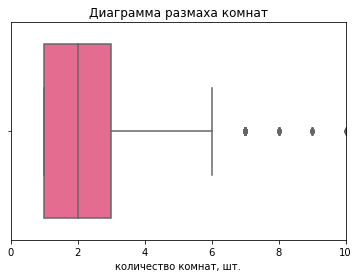

In [62]:
# построение диаграммы размаха
_ = sns.boxplot(x=data['rooms'], color='#F85888')
_.set(xlabel='количество комнат, шт.',
 title='Диаграмма размаха комнат')
plt.xlim(0,10)
plt.show()

На диаграмме мы видим наглядно 1, 3 квартили и медиану. В размах усов попали только "нормальные" значения, точками обозначены выбросы. Выбросы - значения, которые оказались вдали от среднего. На графике выбросы - значения выше 6.  
"Усы" обозначают степень разброса (дисперсии) значений за пределами верхнего и нижнего квартилей. Левый ус упирается в минимальное значение. У нас есть только правый ус, который заканчивается на 6. 
Более высокие значения рисуются отдельными точками. Выбросов, которые отсек правый ус, не очень много, так как точки не сливаются, и медиана не сдвинута к длинному хвосту.  
Данные смещены к началу координат. Медиана практически равна среднему, это видно на графике, так как медиана расположена по середине. 3 квартиль равен 3, а дальше начинается ус, значит чаще всего в выборке встречаются объекты с количеством комнат от 1 до 3. Квартиры с 4-6 комнатами гораздо реже, а более 6 комнат уже скорее исключение.

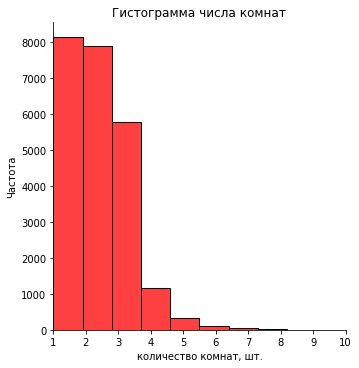

In [63]:
# построение гистограммы
_= sns.displot(x=data['rooms'], kde=False, bins=20, color='red');
plt.xlim(1,10)
plt.title('Гистограмма числа комнат')
_.set(xlabel='количество комнат, шт.')
_ = plt.ylabel('Частота')

Гистограмма подтверждает наше предположение, наибольшая частота приходится на 1-2 комнаты, затем идут квартиры с 3 комнатами. После этого видим резкое падение вероятности встретить квартиру с 4-6 комнатами. 

In [64]:
# определение доли аномальных значений
anomal_value('rooms')

'Аномальные значения составляют 0.38% от размера всей выборки'

*Доля аномальных значений небольшая, менее 1%.*  
*Создадим столбец, где оставим значения комнат от 1-6, а все значения выше обозначим как "большое число комнат".*


In [65]:
# создание столбца с категориями комнат
def rooms_categor(room):
    try:
        if room > 6:
            return 'больше 6 комнат'
        else:
            return room
    except:
        return 'ошибка!!!'
    
    
data['rooms_amount'] = data['rooms'].apply(rooms_categor)

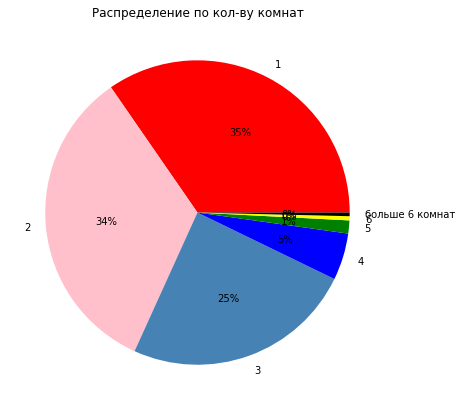

In [66]:
# создание круговой диаграммы распределения числа комнат
rooms_pivot_pie = data.pivot_table(index='rooms_amount', values='last_price', aggfunc='count')
rooms_pivot_pie.columns = ['rooms_amount']
rooms_pivot_pie.plot(
    y='rooms_amount', 
    kind='pie', label='', 
    legend=False, 
    title='Распределение по кол-ву комнат', 
    figsize=(10,7),
    colors = ['red', 'pink', 'steelblue', 'blue', 'green', 'yellow', 'black'],
    autopct='%1.0f%%'
)

plt.show()



*В основном квартиры имеют 1 или 2 комнаты, они составляют почти 70% от всей выборки, следом идут квартиры с 3 комнатами - 25% и замыкают диапазон квартиры с 4 комнатами - 5%. Есть объекты с 5 и 6 комнатами, но их доля мала. Квартиры с числом комнат больше 6 будем считать выбросами.*

<li><b><font color='purple'>last_price</font></b></li>

In [67]:
# вывод статистических характеристик 
data['last_price'].describe()

count    2.350600e+04
mean     6.546657e+06
std      1.091485e+07
min      1.219000e+04
25%      3.435000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

*Значение медианы меньше среднего, эта разница между средним значением и медианой указывает на то, что существует несколько наблюдений/строк с экстремальными значениями, которые увеличивают среднее значение, то есть в выборке есть выбросы. Стандартное отклонение имеет высокое значение, это связано с наличием выбросов в выборке. Построим диаграмму размаха, чтобы оценить характер распределения наблюдений в выборке и отсечь выбросы*

In [68]:
# определение границ "усов" с нормальными значениями
range_limit('last_price')

(12190.0, 11847500.0)

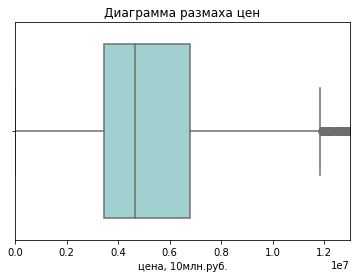

In [69]:
# построение диаграммы размаха
_ = sns.boxplot(x=data['last_price'], color='#98D8D8')
_.set(xlabel='цена, 10млн.руб.',
 title='Диаграмма размаха цен')
plt.xlim(0,13000000)
plt.show()

На диаграмме мы видим наглядно 1, 3 квартили и медиану. В размах усов попали только "нормальные" значения, точками обозначены выбросы. Выбросы - значения, которые оказались вдали от среднего. На графике выбросы - значения выше 12млн.руб.
"Усы" обозначают степень разброса (дисперсии) значений за пределами верхнего и нижнего квартилей. Левый ус упирается в минимальное значение. Более высокие значения рисуются отдельными точками. Выбросов, которые отсек правый ус, не много, хотя точки сливаются, но медиана не сдвинута к длинному хвосту.
Медиана не равна среднему, это видно на графике, она сдвинута к первому квартилю, а левый ус короче правого. Имеем дело с ассиметрией, значения распределены неравномерно в выборке. Квартиры ценой 4млн.руб. встречаются чаще всего, но в распределении есть длинный правый хвост, который представляет квартиры, которые имеют очень высокую стоимость(выбросы). Они сдвинули значение среднего.

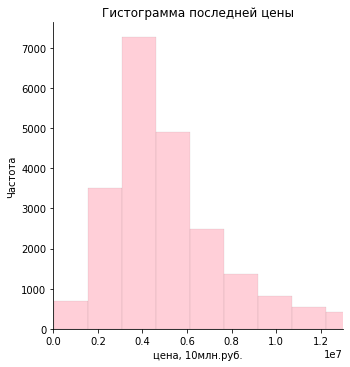

In [70]:
# построение гистограммы
_= sns.displot(x=data['last_price'], kde=False, bins=500, color='pink');
plt.xlim(0,13000000)
plt.title('Гистограмма последней цены')
_.set(xlabel='цена, 10млн.руб.')
_ = plt.ylabel('Частота')

Гистограмма подтверждает наше предположение, наибольшая частота приходится на квартиры ценой около 4млн.руб., затем идут квартиры за 5-6млн.руб.

In [71]:
# определение доли аномальных значений
anomal_value('last_price')

'Аномальные значения составляют 8.71% от размера всей выборки'

In [72]:
# создание столбца с категориями цены
def price_categor(price):
    try:
        if price > range_limit('last_price')[1]:
            return 'дороже 11.8млн'
        else:
            return price
    except:
        return 'ошибка!!!'
    
    
data['price_high'] = data['last_price'].apply(price_categor)

*Итак, цены на квартиры лежат в диапазоне от 2 до 12 млн. Основная часть объектов имеет стоимость от 3 до 5 млн.руб. Цены выше 12млн.руб. будем считать выбросами.*

<li><b><font color='purple'>total_area</font></b></li>

In [73]:
# вывод статистических характеристик 
data['total_area'].describe()

count    23506.000000
mean        60.392139
std         35.604838
min         12.000000
25%         40.000000
50%         52.000000
75%         69.875000
max        900.000000
Name: total_area, dtype: float64

Значение медианы выше среднего, эта разница между средним значением и медианой указывает на то, что существует несколько наблюдений/строк с экстремальными значениями, которые увеличивают среднее значение, то есть в выборке есть выбросы. Стандартное отклонение очень(!) высокое, значения имеют большую изменчивость(волатильность), на это влияют выбросы в выборке. Высокое значение отклонения указывает на то, что данные распределены по большому диапазону значений.  
Построим диаграмму размаха, чтобы оценить характер распределения наблюдений в выборке и отсечь выбросы

In [74]:
# определение границ "усов" с нормальными значениями
range_limit('total_area')

(12.0, 114.69)

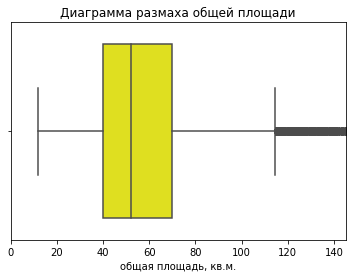

In [75]:
# построение диаграммы размаха
_ = sns.boxplot(x=data['total_area'], color='yellow')
_.set(xlabel='общая площадь, кв.м.',
 title='Диаграмма размаха общей площади')
plt.xlim(0,145)
plt.show()

На диаграмме мы видим наглядно 1, 3 квартили и медиану. В размах усов попали только "нормальные" значения, точками обозначены выбросы. Выбросы - значения, которые оказались вдали от среднего. На графике выбросы - значения выше 115кв.м. "Усы" обозначают степень разброса (дисперсии) значений за пределами верхнего и нижнего квартилей. Левый ус упирается в минимальное значение. Более высокие значения рисуются отдельными точками. Выбросов, которые отсек правый ус, не много, хотя точки сливаются, но медиана не сдвинута к длинному хвосту. Медиана не равна среднему, это видно на графике, она сдвинута к первому квартилю, а левый ус короче правого.  
Имеем дело с правосторонней ассиметрией, значения распределены неравномерно в выборке. Квартиры площадью 50кв.м. встречаются чаще всего, но в распределении есть длинный правый хвост, который представляет квартиры, которые имеют очень большую площадь(выбросы). Они сдвинули значение среднего.

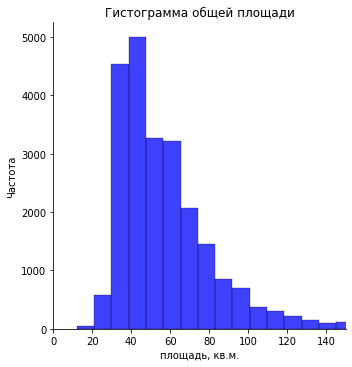

In [76]:
# построение гистограммы
_= sns.displot(x=data['total_area'], kde=False, bins=100, color='blue');
plt.xlim(0,150)
plt.title('Гистограмма общей площади')
_.set(xlabel='площадь, кв.м.')
_ = plt.ylabel('Частота')

In [77]:
# определение доли аномальных значений
anomal_value('total_area')

'Аномальные значения составляют 5.24% от размера всей выборки'

In [78]:
# создание столбца с категориями площади
def area_categor(area):
    try:
        if area > range_limit('total_area')[1]:
            return 'площадь больше 115кв.м.'
        else:
            return area
    except:
        return 'ошибка!!!'
    
    
data['area_high'] = data['total_area'].apply(area_categor)

Гистограмма подтверждает наше предположение, наибольшая частота приходится на квартиры площадью 40кв.м., затем идут квартиры по 30кв.м.
Большая часть квартир имеет метраж от 30 до 60 кв.м. Есть квартиры и по 12кв.м и 900кв.м, но это единичные выбросы.

<li><b><font color='purple'>ceiling_height_m</font></b></li>

In [79]:
# вывод статистических характеристик 
data['ceiling_height_m'].describe()

count    23506.000000
mean         2.734211
std          0.982424
min          1.000000
25%          2.550000
50%          2.650000
75%          2.750000
max        100.000000
Name: ceiling_height_m, dtype: float64

Значение медианы немного ниже среднего, они почти равны, это хороший признак. Небольшая разница связана с наличием выбросов, это можно заметить по высоте потолка в 100м и 1м.  
Стандартное отклонение практически равно 1, данные не очень однородны и распределены неравномерно. Высокое значение отклонения указывает на то, что данные распределены по большому диапазону значений, на это влияет наличие выбросов.
Построим диаграмму размаха, чтобы оценить характер распределения наблюдений в выборке и отсечь выбросы

In [80]:
# вывод уникальных значений столбца ceiling_height_m
data['ceiling_height_m'].unique()

array([  2.7 ,   2.75,   2.55,   2.6 ,   3.03,   2.65,   2.66,   2.5 ,
         2.67,   2.56,   3.  ,   3.05,   2.8 ,   2.9 ,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.59,   2.  ,   2.45,
         3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,   3.16,
         3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,   5.  ,
         2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,   2.83,
         4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,   3.18,
         3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,   2.63,
         3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,   3.66,
         3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,   3.36,
        32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,   3.26,
      

*Видно, что в высоте потолков встречаются аномалии, всего 9 значений. Такие значения, как 20, 22 и др. говорят о том, что пользователь, вводя данные, забыл/пропустил разделяющий знак. Следует обработать данные значения.*

In [81]:
# замена аномальных значений в столбце ceiling_height_m
def ceil_anomal(num):
    if num < 11:
        return num
    elif num>11:
        return round(num/10,1)
        
data['ceiling_height_m'] = data['ceiling_height_m'].apply(ceil_anomal)        

In [82]:
data['ceiling_height_m'].unique()

array([ 2.7 ,  2.75,  2.55,  2.6 ,  3.03,  2.65,  2.66,  2.5 ,  2.67,
        2.56,  3.  ,  3.05,  2.8 ,  2.9 ,  3.2 ,  2.61,  3.25,  3.45,
        2.77,  2.85,  2.64,  2.57,  4.15,  3.5 ,  3.3 ,  2.71,  4.  ,
        2.47,  2.73,  2.84,  3.1 ,  2.34,  3.4 ,  3.06,  2.72,  2.54,
        2.51,  2.78,  2.76,  2.58,  3.7 ,  2.52,  5.2 ,  2.87,  2.59,
        2.  ,  2.45,  3.6 ,  2.92,  3.11,  3.13,  3.8 ,  3.15,  3.55,
        3.16,  3.62,  3.12,  2.53,  2.74,  2.96,  2.46,  5.3 ,  5.  ,
        2.79,  2.95,  4.06,  2.94,  3.82,  3.54,  3.53,  2.83,  4.7 ,
        2.4 ,  3.38,  3.01,  5.6 ,  3.65,  3.9 ,  3.18,  3.35,  2.3 ,
        3.57,  2.48,  2.62,  2.82,  3.98,  2.63,  3.83,  3.52,  3.95,
        3.75,  2.88,  3.67,  3.87,  3.66,  3.85,  3.86,  4.19,  3.24,
        4.8 ,  4.5 ,  4.2 ,  3.36,  3.08,  3.68,  3.07,  3.37,  3.09,
        8.  ,  3.26,  3.34,  2.81,  3.44,  2.97,  3.14,  4.37,  2.68,
        3.22,  3.27,  4.1 ,  2.93,  3.46,  3.47,  3.33,  3.63,  3.32,
        1.2 ,  8.3 ,

In [83]:
# определение границ "усов" с нормальными значениями
range_limit('ceiling_height_m')

(2.25, 3.05)

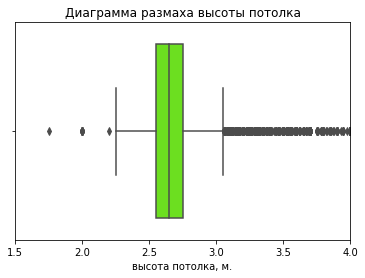

In [84]:
# построение диаграммы размаха
_ = sns.boxplot(x=data['ceiling_height_m'], color='#66ff00')
_.set(xlabel='высота потолка, м.',
 title='Диаграмма размаха высоты потолка')
plt.xlim(1.5,4)
plt.show()

На диаграмме мы видим наглядно 1, 3 квартили и медиану. В размах усов попали только "нормальные" значения, точками обозначены выбросы.  
Выбросы - значения, которые оказались вдали от среднего. На графике выбросы - потолки выше 3.05м и ниже 2.25м. "Усы" обозначают степень разброса (дисперсии) значений за пределами верхнего и нижнего квартилей. Левый ус упирается в минимальное значение, правый - в максимальное.  
Выбросов, которые отсек левый ус, мало, гораздо больше выбросов, отсеченных справа, но они не сдвинули среднее. 
Медиана почти равна среднему, это видно на графике, длина усов почти равна. Ассеметричное распределение, значения распределены достаточно равномерно в выборке. 

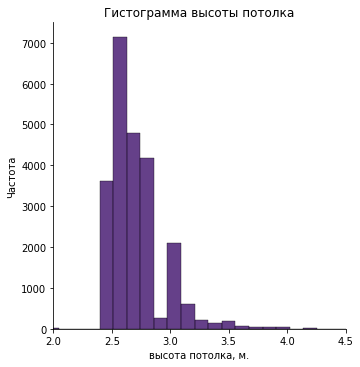

In [85]:
# построение гистограммы
_= sns.displot(x=data['ceiling_height_m'], kde=False, bins=80, color='#310062');
plt.xlim(2,4.5)
plt.title('Гистограмма высоты потолка')
_.set(xlabel='высота потолка, м.')
_ = plt.ylabel('Частота')

Гистограмма показывает нам, что чаще всего встречаются квартиры с потолками 2.5м-2.75м, также чаще остальных встречаются квартиры с потолками около 3м. Есть квартиры с потолкам выше/ниже, но их доля мала.

In [86]:
# определение доли аномальных значений
anomal_value('ceiling_height_m')

'Аномальные значения составляют 6.1% от размера всей выборки'

In [87]:
# создание столбца с категориями высоты потолка
def ceiling_categor(height):
    try:
        if height > range_limit('ceiling_height_m')[1]:
            return 'высота больше 3.05м.'
        elif height < range_limit('ceiling_height_m')[0]:
            return 'высота меньше 2.25м.'
        else:
            return height
    except:
        return 'ошибка!!!'
    
    
data['ceiling_categor'] = data['ceiling_height_m'].apply(ceiling_categor)

<li><b><font color='purple'>days_exposition</font></b></li>

In [88]:
# вывод статистических характеристик 
data['days_exposition'].describe()

count    20335.000000
mean       181.041013
std        219.910780
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

Значение медианы гораздо ниже среднего. Значит, есть много выбросов в выборке, которые сдвинули среднее. Это можно заметить по максимальному количеству дней - 1580, то есть объявление висело 4 года. Это аномалия или выброс. Странно, что это объявление не было автоматически закрыто.
Стандартное отклонение имеет очень большое значение, данные неоднородны и распределены неравномерно. Высокое значение отклонения указывает на то, что данные распределены по большому диапазону значений, на это влияет наличие выбросов. Построим диаграмму размаха, чтобы оценить характер распределения наблюдений в выборке и отсечь выбросы.

In [89]:
# определение границ "усов" с нормальными значениями
range_limit('days_exposition')

(1.0, 512.5)

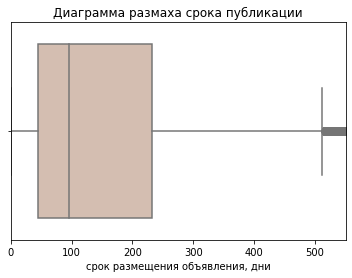

In [90]:
# построение диаграммы размаха
_ = sns.boxplot(x=data['days_exposition'], color='#dabdab')
_.set(xlabel='срок размещения объявления, дни',
 title='Диаграмма размаха срока публикации')
plt.xlim(0,550)
plt.show()

На диаграмме мы видим наглядно 1, 3 квартили и медиану. В размах усов попали только "нормальные" значения, точками обозначены выбросы. Выбросы - значения, которые оказались вдали от среднего. На графике выбросы - значения выше 512дней. "Усы" обозначают степень разброса (дисперсии) значений за пределами верхнего и нижнего квартилей. Левый ус упирается в минимальное значение, правый - в максимальное. Более высокие значения рисуются отдельными точками.   
Выбросов, которые отсек правый ус, не много, хотя точки сливаются, но медиана не сдвинута к длинному хвосту. Медиана не равна среднему, это видно на графике, она сдвинута к первому квартилю, а левый ус короче правого. Имеем дело с правосторонней ассиметрией, значения распределены неравномерно в выборке. Чаще всего квартиры продавали в первые 100 дней(чуть больше 3 месяцев), это хороший показатель.

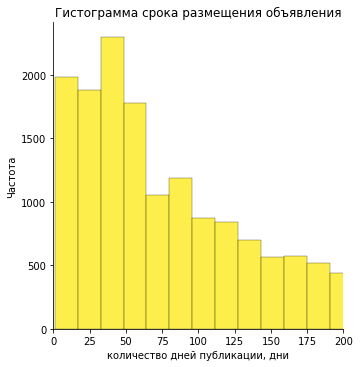

In [91]:
# построение гистограммы
_= sns.displot(x=data['days_exposition'], kde=False, bins=100, color='#fde910');
plt.xlim(0,200)
plt.title('Гистограмма срока размещения объявления')
_.set(xlabel='количество дней публикации, дни')
_ = plt.ylabel('Частота')

Гистограмма показывает, что основная доля квартир продается за первые 50 дней, чем дольше срок объявления, тем меньше количество квартир. На гистограмме видим пик - 40 дней. Чаще всего сделки закрываются за 40 дней. То есть квартиры на сервисе продаются в среднем за 1.5 месяца. Это хороший показатель. 
Стоит отметить рост числа успешных сделок и на 80 днях.
Возможно, это также связано с тем, что на сервисе объявления автоматически снимаются через 40 и 80 дней в зависимости от их типа.

In [92]:
# определение доли аномальных значений
anomal_value('days_exposition')

'Аномальные значения составляют 7.05% от размера всей выборки'

In [93]:
# создание столбца с категориями по сроку размещения объявления
def days_categor(day):
    try:
        if day > range_limit('days_exposition')[1]:
            return 'дольше 512 дней'
        else:
            return day
    except:
        return 'ошибка!!!'
    
    
data['days_categor'] = data['days_exposition'].apply(days_categor)

<li><b><font color='purple'>удаление строк с выбросами</font></b></li>

In [94]:
# создание нового датафрейма без выбросов
good_data = \
     data[(data['rooms_amount'] != 'больше 6 комнат') & 
     (data['price_high'] != 'дороже 11.8млн') &
     (data['area_high'] != 'площадь больше 115кв.м.') &
     (data['ceiling_categor'] != 'высота больше 3.05м.') &
     (data['ceiling_categor'] != 'высота меньше 2.25м.') &
     (data['days_categor'] != 'дольше 512 дней')].reset_index(drop=True)

In [95]:
# рассчет доли строк, которые остались после "чистки" данных
print(f'Доля чистых данных составляет {round((len(good_data)/len(data))*100,2)}% от входных данных.')

Доля чистых данных составляет 81.48% от входных данных.


In [96]:
# вывод статистических характеристик колонок в "чистом" датафрейме
good_data[['total_area', 'last_price', 'rooms', 'ceiling_height_m', 'days_exposition']].describe().T

,count,mean,std,min,25%,50%,75%,max
total_area,19152.0,5.177146e+01,1.704256e+01,12.00,38.60,48.0,62.00,114.50
last_price,19152.0,4.688185e+06,2.101800e+06,12190.00,3290000.00,4300000.0,5790000.00,11809670.00
rooms,19152.0,1.895833e+00,8.592440e-01,1.00,1.00,2.0,3.00,6.00
ceiling_height_m,19152.0,2.653100e+00,1.396904e-01,2.25,2.55,2.6,2.75,3.05
days_exposition,16716.0,1.241317e+02,1.189392e+02,1.00,40.00,79.0,176.00,511.00


 <div style="border:solid red 1px; padding: 20px"> 
    <b><i>Вывод:</i></b><br>
Проанализировав данные, были выявлены следующие аномальные и выдающиеся значения:
    <li>квартиры с 7-19 комнатами;</li>
    <li>пропуск разделяющего знака пользователем при заполнении высоты потолков(потолки высотой 20-100м);</li>
    <li>квартиры с потолками меннее 2м и потолками выше 4м.;</li>
    <li>квартиры с площадью более 115кв.м.;</li>
    <li>квартиры стоимостью более 11.9млн;</li>
    <li>квартиры, которые продавались дольше 512дн(1.5года)</li>
    
Средняя квартира в данной выборке - квартира, имеющая:
    <li>2 комнаты;</li>
    <li>потолки высотой 2,6м;</li>
    <li>общую площадь 50кв.м.;</li>
    <li>стоимость около 4.3млн.руб;</li>
    <li>срок продажи около 80дней.</li>
</div>

In [97]:
data['ceiling_height_m'].unique()

array([ 2.7 ,  2.75,  2.55,  2.6 ,  3.03,  2.65,  2.66,  2.5 ,  2.67,
        2.56,  3.  ,  3.05,  2.8 ,  2.9 ,  3.2 ,  2.61,  3.25,  3.45,
        2.77,  2.85,  2.64,  2.57,  4.15,  3.5 ,  3.3 ,  2.71,  4.  ,
        2.47,  2.73,  2.84,  3.1 ,  2.34,  3.4 ,  3.06,  2.72,  2.54,
        2.51,  2.78,  2.76,  2.58,  3.7 ,  2.52,  5.2 ,  2.87,  2.59,
        2.  ,  2.45,  3.6 ,  2.92,  3.11,  3.13,  3.8 ,  3.15,  3.55,
        3.16,  3.62,  3.12,  2.53,  2.74,  2.96,  2.46,  5.3 ,  5.  ,
        2.79,  2.95,  4.06,  2.94,  3.82,  3.54,  3.53,  2.83,  4.7 ,
        2.4 ,  3.38,  3.01,  5.6 ,  3.65,  3.9 ,  3.18,  3.35,  2.3 ,
        3.57,  2.48,  2.62,  2.82,  3.98,  2.63,  3.83,  3.52,  3.95,
        3.75,  2.88,  3.67,  3.87,  3.66,  3.85,  3.86,  4.19,  3.24,
        4.8 ,  4.5 ,  4.2 ,  3.36,  3.08,  3.68,  3.07,  3.37,  3.09,
        8.  ,  3.26,  3.34,  2.81,  3.44,  2.97,  3.14,  4.37,  2.68,
        3.22,  3.27,  4.1 ,  2.93,  3.46,  3.47,  3.33,  3.63,  3.32,
        1.2 ,  8.3 ,

### Вывод после предобработки данных: 

<p></p>

<div style="border:solid pink 5px; padding: 20px">
<li>Были изменены названия некоторых столбцов: приведены к одному стилю, добавлены единицы измерения для большей наглядности. Также некоторые колонки поменяли местами для лучшей наглядности.</li>
<li>Данные содержали большое количество пропусков, которые затронули 14 столбцов из 22. После обработки пропущенные значения остались в city_сenter_m, parks_around_3km, parks_nearest_m, ponds_around_3km, ponds_nearest_m, days_exposition. Колонку days_exposition не обработали от пропусков, чтобы не искажатьрезультаты исследования. Другие колонки не имеют первостепенное значение для дальнейшего исследования, важно только расстояние до центра в Санкт-Петербурге. Но здесь доля пропусков мала - менее 1%, поэтому эти пропуски остались. К тому же, эти параметры трудны в заполнении, велика возможность исказить реальную картину. </li>
<li>В колонках, где по смыслу могут быть только целочисленные значения (например, количество комнат), был изменен тип данных на int, а также столбец с датой приведен к удобному для дальнейших исследований формату.</li>
<li>Явных дубликатов в данных нет, но встречаются неявные повторы места расположения квартир. Разница может быть в одной букве (е/ё) или типе муниципального образования. Дубликаты также были обработаны и устранены.</li>
<li>В данных выявлены выбросы и аномальные значения, которые были проанализированы и удалены из данных для получения более "чистой" выборки для проведения дальнейших исследований.</li> 

</div>

## Добавление в таблицу новых столбцов

<li><b><font color='purple'>цена одного квадратного метра</font></b></li>

In [98]:
# добавление столбца price_one_m в датафрейм
data['price_one_m'] = round(data['last_price']/data['total_area'], 2)
good_data['price_one_m'] = round(good_data['last_price']/good_data['total_area'], 2)
data.head()
good_data.head()

,locality_name,last_price,rooms,total_area,living_area,kitchen_area,ceiling_height_m,floors_total,floor,balcony,...,parks_around_3km,parks_nearest_m,ponds_around_3km,ponds_nearest_m,rooms_amount,price_high,area_high,ceiling_categor,days_categor,price_one_m
0,посёлок шушары,3350000,1,40.4,18.6,11.0,2.75,11,1,2,...,0.0,0.0,0.0,0.0,1,3350000,40.4,2.75,81.0,82920.79
1,санкт-петербург,10000000,2,100.0,32.0,41.0,3.03,14,13,0,...,2.0,112.0,1.0,48.0,2,10000000,100.0,3.03,121.0,100000.00
2,городской поселок янино-1,2890000,1,30.4,14.4,9.1,2.65,12,5,0,...,NaN,NaN,NaN,NaN,1,2890000,30.4,2.65,55.0,95065.79
3,посёлок парголово,3700000,1,37.3,10.6,14.4,2.66,26,6,1,...,0.0,0.0,0.0,0.0,1,3700000,37.3,2.66,155.0,99195.71
4,санкт-петербург,7915000,2,71.6,31.0,18.9,2.75,24,22,2,...,0.0,0.0,0.0,0.0,2,7915000,71.6,2.75,NaN,110544.69


<li><b><font color='purple'>день недели публикации объявления</font></b></li>

In [99]:
# добавление столбца week_day в датафрейм
data['week_day'] = data['first_day_exposition'].dt.weekday
good_data['week_day'] = good_data['first_day_exposition'].dt.weekday
data.head()
good_data.head()

,locality_name,last_price,rooms,total_area,living_area,kitchen_area,ceiling_height_m,floors_total,floor,balcony,...,parks_nearest_m,ponds_around_3km,ponds_nearest_m,rooms_amount,price_high,area_high,ceiling_categor,days_categor,price_one_m,week_day
0,посёлок шушары,3350000,1,40.4,18.6,11.0,2.75,11,1,2,...,0.0,0.0,0.0,1,3350000,40.4,2.75,81.0,82920.79,1
1,санкт-петербург,10000000,2,100.0,32.0,41.0,3.03,14,13,0,...,112.0,1.0,48.0,2,10000000,100.0,3.03,121.0,100000.00,1
2,городской поселок янино-1,2890000,1,30.4,14.4,9.1,2.65,12,5,0,...,NaN,NaN,NaN,1,2890000,30.4,2.65,55.0,95065.79,0
3,посёлок парголово,3700000,1,37.3,10.6,14.4,2.66,26,6,1,...,0.0,0.0,0.0,1,3700000,37.3,2.66,155.0,99195.71,3
4,санкт-петербург,7915000,2,71.6,31.0,18.9,2.75,24,22,2,...,0.0,0.0,0.0,2,7915000,71.6,2.75,NaN,110544.69,3


<li><b><font color='purple'>месяц публикации объявления</font></b></li>

In [100]:
# добавление столбца month в датафрейм
data['month'] = pd.DatetimeIndex(data['first_day_exposition']).month
good_data['month'] = pd.DatetimeIndex(good_data['first_day_exposition']).month
data.head()
good_data.head()

,locality_name,last_price,rooms,total_area,living_area,kitchen_area,ceiling_height_m,floors_total,floor,balcony,...,ponds_around_3km,ponds_nearest_m,rooms_amount,price_high,area_high,ceiling_categor,days_categor,price_one_m,week_day,month
0,посёлок шушары,3350000,1,40.4,18.6,11.0,2.75,11,1,2,...,0.0,0.0,1,3350000,40.4,2.75,81.0,82920.79,1,12
1,санкт-петербург,10000000,2,100.0,32.0,41.0,3.03,14,13,0,...,1.0,48.0,2,10000000,100.0,3.03,121.0,100000.00,1,6
2,городской поселок янино-1,2890000,1,30.4,14.4,9.1,2.65,12,5,0,...,NaN,NaN,1,2890000,30.4,2.65,55.0,95065.79,0,9
3,посёлок парголово,3700000,1,37.3,10.6,14.4,2.66,26,6,1,...,0.0,0.0,1,3700000,37.3,2.66,155.0,99195.71,3,11
4,санкт-петербург,7915000,2,71.6,31.0,18.9,2.75,24,22,2,...,0.0,0.0,2,7915000,71.6,2.75,NaN,110544.69,3,4


<li><b><font color='purple'>год публикации объявления</font></b></li>

In [101]:
# добавление столбца year в датафрейм
data['year'] = pd.DatetimeIndex(data['first_day_exposition']).year
good_data['year'] = pd.DatetimeIndex(good_data['first_day_exposition']).year
data.head()
good_data.head()

,locality_name,last_price,rooms,total_area,living_area,kitchen_area,ceiling_height_m,floors_total,floor,balcony,...,ponds_nearest_m,rooms_amount,price_high,area_high,ceiling_categor,days_categor,price_one_m,week_day,month,year
0,посёлок шушары,3350000,1,40.4,18.6,11.0,2.75,11,1,2,...,0.0,1,3350000,40.4,2.75,81.0,82920.79,1,12,2018
1,санкт-петербург,10000000,2,100.0,32.0,41.0,3.03,14,13,0,...,48.0,2,10000000,100.0,3.03,121.0,100000.00,1,6,2018
2,городской поселок янино-1,2890000,1,30.4,14.4,9.1,2.65,12,5,0,...,NaN,1,2890000,30.4,2.65,55.0,95065.79,0,9,2018
3,посёлок парголово,3700000,1,37.3,10.6,14.4,2.66,26,6,1,...,0.0,1,3700000,37.3,2.66,155.0,99195.71,3,11,2017
4,санкт-петербург,7915000,2,71.6,31.0,18.9,2.75,24,22,2,...,0.0,2,7915000,71.6,2.75,NaN,110544.69,3,4,2019


<li><b><font color='purple'>тип этажа квартиры</font></b></li>

In [102]:
# создание функции определения типа этажа
def floor_type(row):
    floor = row['floor']
    floor_total = row['floors_total']
    try:
        if floor == 1:
            return 'первый'
        elif floor==floor_total:
            return 'последний'
        else:
            return 'другой'
    except:
        return 'ошибка!!!'

In [103]:
# добавление столбца floor_type в датафрейм с типом этажа квартиры
data['floor_type'] = data.apply(floor_type, axis=1)
good_data['floor_type'] = good_data.apply(floor_type, axis=1)

# проверка на наличие ошибок
print(data['floor_type'].unique())
print(good_data['floor_type'].unique())

data.head()
good_data.head()

['другой' 'первый' 'последний']
['первый' 'другой' 'последний']


,locality_name,last_price,rooms,total_area,living_area,kitchen_area,ceiling_height_m,floors_total,floor,balcony,...,rooms_amount,price_high,area_high,ceiling_categor,days_categor,price_one_m,week_day,month,year,floor_type
0,посёлок шушары,3350000,1,40.4,18.6,11.0,2.75,11,1,2,...,1,3350000,40.4,2.75,81.0,82920.79,1,12,2018,первый
1,санкт-петербург,10000000,2,100.0,32.0,41.0,3.03,14,13,0,...,2,10000000,100.0,3.03,121.0,100000.00,1,6,2018,другой
2,городской поселок янино-1,2890000,1,30.4,14.4,9.1,2.65,12,5,0,...,1,2890000,30.4,2.65,55.0,95065.79,0,9,2018,другой
3,посёлок парголово,3700000,1,37.3,10.6,14.4,2.66,26,6,1,...,1,3700000,37.3,2.66,155.0,99195.71,3,11,2017,другой
4,санкт-петербург,7915000,2,71.6,31.0,18.9,2.75,24,22,2,...,2,7915000,71.6,2.75,NaN,110544.69,3,4,2019,другой


<li><b><font color='purple'>расстояние до центра города в км</font></b></li>

In [104]:
# добавление столбца city_сenter_km в датафрейм
data['city_сenter_km'] = round(data['city_сenter_m']/1000, 0)
good_data['city_сenter_km'] = round(good_data['city_сenter_m']/1000, 0)
data.head()
good_data.head()

,locality_name,last_price,rooms,total_area,living_area,kitchen_area,ceiling_height_m,floors_total,floor,balcony,...,price_high,area_high,ceiling_categor,days_categor,price_one_m,week_day,month,year,floor_type,city_сenter_km
0,посёлок шушары,3350000,1,40.4,18.6,11.0,2.75,11,1,2,...,3350000,40.4,2.75,81.0,82920.79,1,12,2018,первый,19.0
1,санкт-петербург,10000000,2,100.0,32.0,41.0,3.03,14,13,0,...,10000000,100.0,3.03,121.0,100000.00,1,6,2018,другой,8.0
2,городской поселок янино-1,2890000,1,30.4,14.4,9.1,2.65,12,5,0,...,2890000,30.4,2.65,55.0,95065.79,0,9,2018,другой,NaN
3,посёлок парголово,3700000,1,37.3,10.6,14.4,2.66,26,6,1,...,3700000,37.3,2.66,155.0,99195.71,3,11,2017,другой,19.0
4,санкт-петербург,7915000,2,71.6,31.0,18.9,2.75,24,22,2,...,7915000,71.6,2.75,NaN,110544.69,3,4,2019,другой,12.0


### Вывод: 

<p></p>

<div style="border:solid pink 5px; padding: 20px">
В исходный датафрейм и датафрейм, очищенный от аномалий было добавлено 6 столбцов:
    <li>цена 1кв.м</li>
    <li>день публикации(0 - понедельник)</li>
    <li>месяц публикации</li>
    <li>год публикации</li>
    <li>тип этажа(первый, последний, другой)</li>
    <li>расстояние до центра в км</li>
</div>

## Исследовательский анализ данных

### Изучить параметры

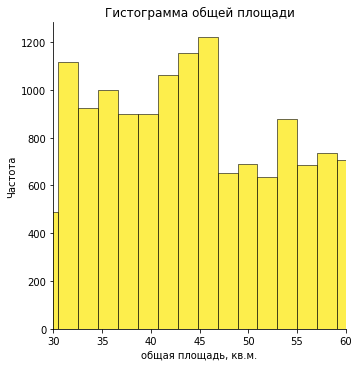

In [105]:
# построение гистограммы общей площади
_= sns.displot(x=good_data['total_area'], kde=False, bins=50, color='#fde910');
plt.xlim(30,60)
plt.title('Гистограмма общей площади')
_.set(xlabel='общая площадь, кв.м.')
_ = plt.ylabel('Частота')

In [106]:
# вывод статистических характеристик 
good_data['total_area'].describe()

count    19152.000000
mean        51.771463
std         17.042562
min         12.000000
25%         38.600000
50%         48.000000
75%         62.000000
max        114.500000
Name: total_area, dtype: float64

*На гистограмме видно, что больше всего в выборке объявлений о продаже квартир площадью около 45кв.м. В целом чаще всего можно встретить квартиры площадью 40-45кв.м. и 30кв.м.  
Квартиры площадью меньше 30кв.м и больше 60кв.м. встречаются гораздо реже.*  

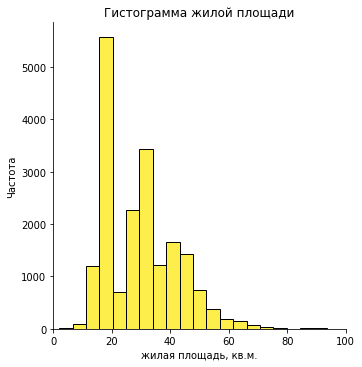

In [107]:
# построение гистограммы жилой площади
_= sns.displot(x=good_data['living_area'], kde=False, bins=20, color='#fde910');
plt.xlim(0,100)
plt.title('Гистограмма жилой площади')
_.set(xlabel='жилая площадь, кв.м.')
_ = plt.ylabel('Частота')

In [108]:
# вывод статистических характеристик 
good_data['living_area'].describe()

count    19152.000000
mean        29.574380
std         12.272752
min          2.000000
25%         18.000000
50%         29.000000
75%         38.000000
max         93.600000
Name: living_area, dtype: float64

*На гистограмме видно, что чаще всего в выборке можно встретить квартиру с жилой площадью 15 и 30кв.м.  
Есть жилая площадь 2кв.м., это аномальное значение, оно появилось в выборке из-за квартиры общей площадью - 12кв.м. В соответствии с ЖК РФ, размер жилой площади не может быть меньше **12кв.м**. Поэтому данные о такой квартире и таком метраже вызывают сомнения.*

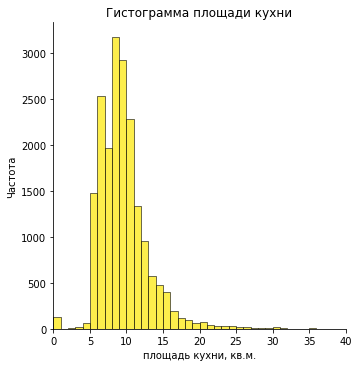

In [109]:
# построение гистограммы площади кухни
_= sns.displot(x=good_data['kitchen_area'], kde=False, bins=50, color='#fde910');
plt.xlim(0,40)
plt.title('Гистограмма площади кухни')
_.set(xlabel='площадь кухни, кв.м.')
_ = plt.ylabel('Частота')

In [110]:
# вывод статистических характеристик 
good_data['kitchen_area'].describe()

count    19152.000000
mean         9.332572
std          3.529081
min          0.000000
25%          7.000000
50%          9.000000
75%         10.712500
max         50.000000
Name: kitchen_area, dtype: float64

*На гистограмме видно, что чаще всего в выборке можно встретить квартиру с площадью кухни 9кв.м. Медиана и среднее в этом столбце близки, несмотря на то, что есть выбросы (50кв.м-максимальное значение), их количество мало, поэтому они не сдвинули значение среднего.
Есть квартиры с площадью кухни - 0кв.м, это студии. В таких квартирах нет отдельного выделения кухни.*

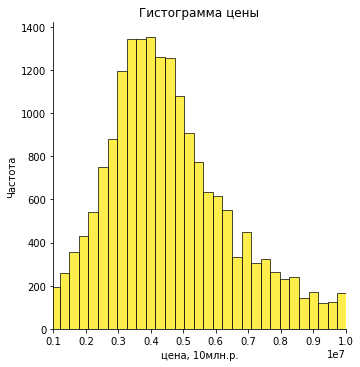

In [111]:
# построение гистограммы цены 
_= sns.displot(x=good_data['last_price'], kde=False, bins=40, color='#fde910');
plt.xlim(1000000,10000000)
plt.title('Гистограмма цены')
_.set(xlabel='цена, 10млн.р.')
_ = plt.ylabel('Частота')

In [112]:
# вывод статистических характеристик 
good_data['last_price'].describe()

count    1.915200e+04
mean     4.688185e+06
std      2.101800e+06
min      1.219000e+04
25%      3.290000e+06
50%      4.300000e+06
75%      5.790000e+06
max      1.180967e+07
Name: last_price, dtype: float64

*На гистограмме распределение цен напоминает нормальное распределение. Чем дороже/дешевле чем 4млн.руб. стоит квартира, тем меньше вероятность ее встретить в выборке. Форма графика весьма симметрична.  
Диапазон цен представлен от 1 до 12млн.руб.  
Чаще всего представлены квартиры стоимостью около 3.3-4.3млн.руб.  
Медиана и среднее близки друг к другу.*

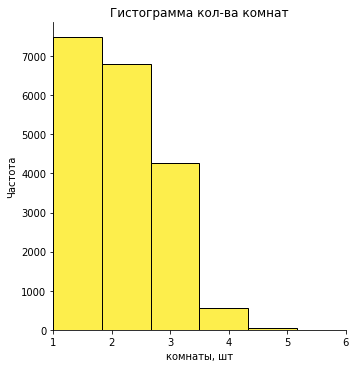

In [113]:
# построение гистограммы количества комнат
_= sns.displot(x=good_data['rooms'], kde=False, bins=6, color='#fde910');
plt.xlim(1,6)
plt.title('Гистограмма кол-ва комнат')
_.set(xlabel='комнаты, шт')
_ = plt.ylabel('Частота')

In [114]:
# вывод статистических характеристик 
good_data['rooms'].describe()

count    19152.000000
mean         1.895833
std          0.859244
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: rooms, dtype: float64

              rooms_amount
rooms_amount              
1                     7488
2                     6809
3                     4260
4                      554
5                       39
6                        2


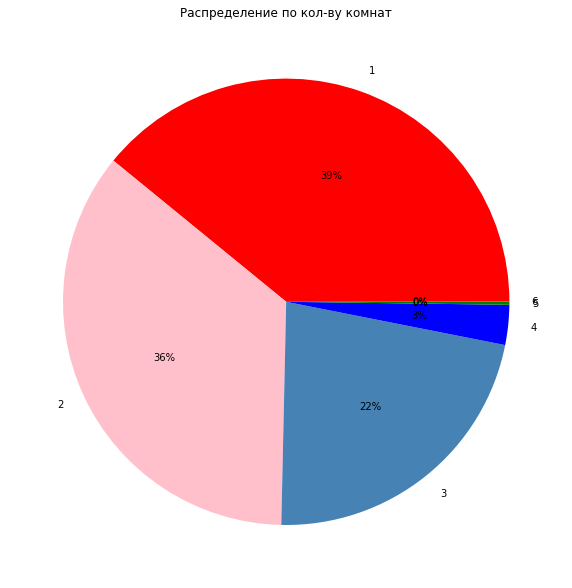

In [115]:
# создание круговой диаграммы распределения числа комнат
rooms_pivot_pie_new = good_data.pivot_table(index='rooms_amount', values='last_price', aggfunc='count')
rooms_pivot_pie_new.columns = ['rooms_amount']
rooms_pivot_pie_new.plot(
    y='rooms_amount', 
    kind='pie', label='', 
    legend=False, 
    title='Распределение по кол-ву комнат', 
    figsize=(10,20),
    colors = ['red', 'pink', 'steelblue', 'blue', 'green', 'yellow', 'black'],
    autopct='%1.0f%%'
)
print(rooms_pivot_pie_new)
plt.show()

*Изучив гистограмму и круговую диаграмму, сделаем вывод, что чаще всего на продажу выставляли однокомнатные квартиры, всегоо на 3п.п. отстают 2-комнатные квартиры. Такие квартиры составляют 75% всей выборки.  
Следом идут квартиры с тремя комнатами, их доля - 22%.  
Квартир с 5-6 комнатами очень мало, доля всего лишь 0.22%.*

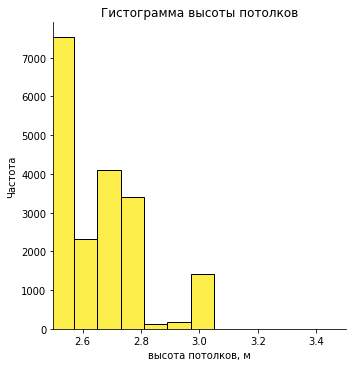

In [116]:
# построение гистограммы высоты потолков
_= sns.displot(x=good_data['ceiling_height_m'], kde=False, bins=10, color='#fde910');
plt.xlim(2.5,3.5)
plt.title('Гистограмма высоты потолков')
_.set(xlabel='высота потолков, м')
_ = plt.ylabel('Частота')

In [117]:
# вывод статистических характеристик 
good_data['ceiling_height_m'].describe()

count    19152.00000
mean         2.65310
std          0.13969
min          2.25000
25%          2.55000
50%          2.60000
75%          2.75000
max          3.05000
Name: ceiling_height_m, dtype: float64

*Гистограмма показывает нам, что чаще всего встречаются квартиры с потолками 2.5м и 2.75м, дальше идут квартиры с потолками около 3м. Есть квартиры с потолкам выше/ниже, но их доля очень мала.*

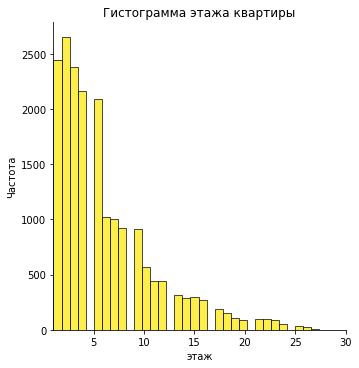

In [118]:
# построение гистограммы этажа квартиры
_= sns.displot(x=good_data['floor'], kde=False, bins=40, color='#fde910');
plt.xlim(1,30)
plt.title('Гистограмма этажа квартиры')
_.set(xlabel='этаж')
_ = plt.ylabel('Частота')

In [119]:
# вывод статистических характеристик 
data['floor'].describe()

count    23506.000000
mean         5.868757
std          4.862133
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

            floor_amount
floor_type              
другой             14136
первый              2442
последний           2574


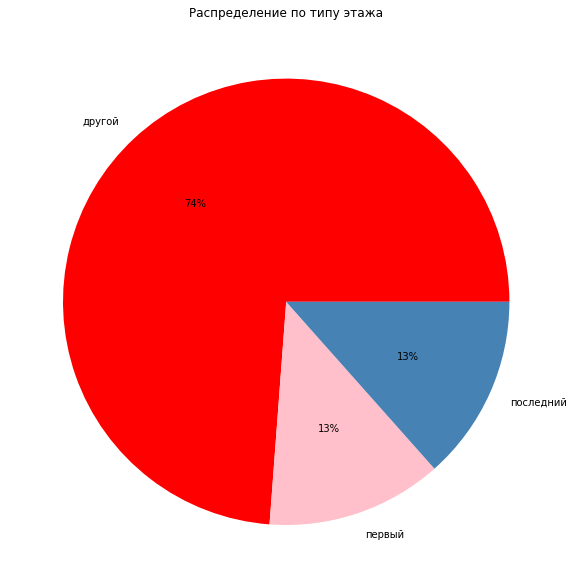

In [120]:
floor_pivot_pie= good_data.pivot_table(index='floor_type', values='last_price', aggfunc='count')
floor_pivot_pie.columns = ['floor_amount']
floor_pivot_pie.plot(
    y='floor_amount', 
    kind='pie', label='', 
    legend=False, 
    title='Распределение по типу этажа', 
    figsize=(10,20),
    colors = ['red', 'pink', 'steelblue'],
    autopct='%1.0f%%'
)
print(floor_pivot_pie)
plt.show()

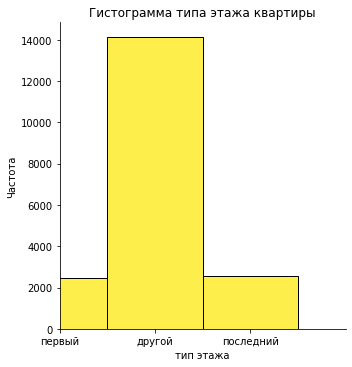

In [121]:
# построение гистограммы типа этажа
_= sns.displot(x=good_data['floor_type'], kde=False, bins=100, color='#fde910');
plt.xlim(0,3)
plt.title('Гистограмма типа этажа квартиры')
_.set(xlabel='тип этажа')
_ = plt.ylabel('Частота')

*На круговой диаграмме видно, что квартиры на 1 и последнем этажах продают в равном количестве - по 13% от всей выборки.  
Основная доля квартир расположена на других этажах. 
На гистограмме пик приходится на квартиры, расположенные на втором этаже. Следом идут 1 и 3 этажи, затем - 4 и 6.  
Возможно, это связано с тем, что люди чаще всего продают квартиры в хрущевках, которые имеют 5 этажей.*

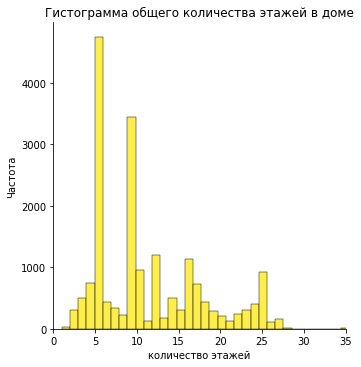

In [122]:
# построение гистограммы общего количества этажей в доме
_= sns.displot(x=good_data['floors_total'], kde=False, bins=60, color='#fde910');
plt.xlim(0,35)
plt.title('Гистограмма общего количества этажей в доме')
_.set(xlabel='количество этажей')
_ = plt.ylabel('Частота')

In [123]:
# вывод статистических характеристик 
good_data['floors_total'].describe()

count    19152.000000
mean        10.982822
std          6.656743
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

*Чаще всего продают квартиры в 5-этажных домах, что и требовалось доказать, следом идут 9-этажные дома. Следом идут 12 и 16-этажные дома.  
Скорее всего это хрущевки или брежневки. Теперь в основном такие квартиры выполняют роль временного жилья, и сделки с ними совершают чаще по мере накопления средств на квартиру в новостройке.  
В стране развивают ипотечное кредитование, идет массовое строительство новостроек, все это провоцирует всплеск продаж таких квартир.*

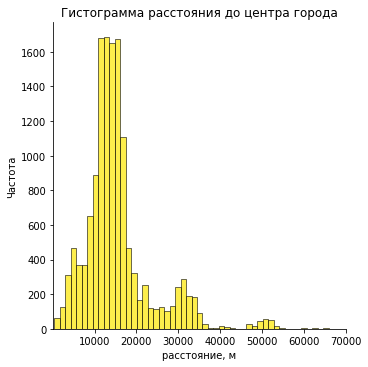

In [124]:
# построение гистограммы расстояния до центра города
_= sns.displot(x=good_data['city_сenter_m'], kde=False, bins=50, color='#fde910');
plt.xlim(175,70000)
plt.title('Гистограмма расстояния до центра города')
_.set(xlabel='расстояние, м')
_ = plt.ylabel('Частота')

In [125]:
# вывод статистических характеристик 
good_data['city_сenter_m'].describe()

count    14134.000000
mean     15420.566931
std       8268.703525
min        399.000000
25%      11159.000000
50%      13916.000000
75%      16804.000000
max      65952.000000
Name: city_сenter_m, dtype: float64

*Чаще всего можно встретить объявление о квартире, которая находится на расстоянии 11-15км.от центра города. Чем ближе к центру, тем меньше квартир. Также редко можно встретить квартиру, которая находится дальше 20км.от центра города.*

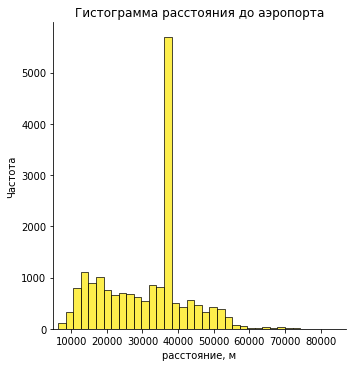

In [126]:
# построение гистограммы расстояния до ближайшего аэропорта
_= sns.displot(x=good_data['airports_nearest_m'], kde=False, bins=40, color='#fde910');
plt.xlim(5000,87000)
plt.title('Гистограмма расстояния до аэропорта')
_.set(xlabel='расстояние, м')
_ = plt.ylabel('Частота')

In [127]:
# вывод статистических характеристик 
good_data['airports_nearest_m'].describe()

count    19152.000000
mean     31115.375196
std      11818.431079
min          0.000000
25%      20638.500000
50%      35517.000000
75%      36689.250000
max      84853.000000
Name: airports_nearest_m, dtype: float64

In [128]:
# создание сводной таблицы с численностью объявлений в населенных пунктах
airports = good_data.pivot_table(index='locality_name', values='total_area', aggfunc='count')

# переименование столбца
airports.columns = ['count']

In [129]:
# создание списка с расстоянием от центра населенных пунктов до аэропорта Пулково
distance = [36, 42, 25, 10, 47, 25, 59]

# вывод 7 населенных пунктов с наибольшим числом объявлений
airports = airports.loc[airports['count']>=300].sort_values(by='count', ascending=False)

# добавление столбца с расстоянием в сводную таблицу
airports['distance'] = distance

# вывод среднего расстояния
print(round(airports['distance'].mean(),0))
airports

35.0


,count,distance
locality_name,,
санкт-петербург,11983,36
мурино,547,42
кудрово,421,25
посёлок шушары,415,10
всеволожск,359,47
колпино,311,25
посёлок парголово,309,59


*Очень много квартир расположены в 35км от аэропорта. Основная масса объявлений выставлена о квартирах, котораые расположены именно на таком расстоянии. В Санкт-Петербурге есть один аэропорт - Пулково. Он находится на юге города. 
На сводной таблице мы видим в каких населенных пунктах больше всего объявлений о продаже. Изучив расстояние от центров этих административных единиц до аэропорта, было получено среднее значение - 35км. Похоже на правду.  
Есть квартиры на расстоянии 0 метров от аэропорта. Похоже на аномальное значение.*

In [130]:
# вывод строки с расстоянием до аэропорта 0м
good_data.loc[good_data['airports_nearest_m']==0]

,locality_name,last_price,rooms,total_area,living_area,kitchen_area,ceiling_height_m,floors_total,floor,balcony,...,price_high,area_high,ceiling_categor,days_categor,price_one_m,week_day,month,year,floor_type,city_сenter_km
17028,санкт-петербург,7000000,1,34.7,19.8,6.0,2.7,9,3,2,...,7000000,34.7,2.7,60.0,201729.11,6,9,2018,другой,23.0


*У одной квартиры расстояние до аэропорта 0м, выглядит странно. Не может же квартира быть построена прям в аэропорту. Скорее всего квартира расположена близко, но не настолько. Система рассчета дала сбой.*

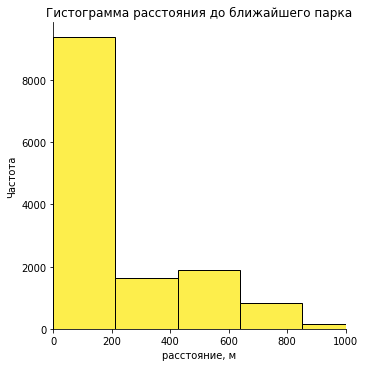

In [131]:
# построение гистограммы расстояния до ближайшего парка
_= sns.displot(x=good_data['parks_nearest_m'], kde=False, bins=15, color='#fde910');
plt.xlim(0,1000)
plt.title('Гистограмма расстояния до ближайшего парка')
_.set(xlabel='расстояние, м')
_ = plt.ylabel('Частота')

*Большинство квартир имеют парки в пределах 200м*

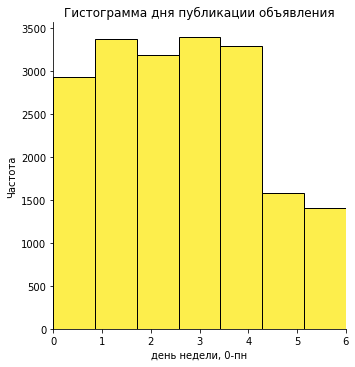

In [132]:
# построение гистограммы дня публикации объявления
_= sns.displot(x=good_data['week_day'], kde=False, bins=7, color='#fde910');
plt.xlim(0,6)
plt.title('Гистограмма дня публикации объявления')
_.set(xlabel='день недели, 0-пн')
_ = plt.ylabel('Частота')

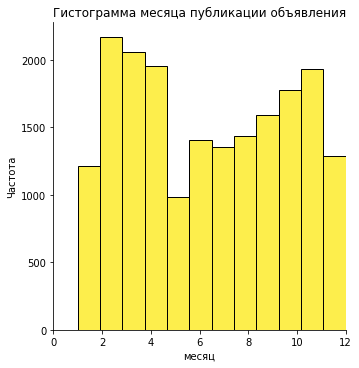

In [133]:
# построение гистограммы месяца публикации объявления
_= sns.displot(x=good_data['month'], kde=False, bins=12, color='#fde910');
plt.xlim(0,12)
plt.title('Гистограмма месяца публикации объявления')
_.set(xlabel='месяц')
_ = plt.ylabel('Частота')

*Чаще всего объявления размещали во вторник и четверг, затем по убыванию: пятница, среда, понедельник. В выходные объявления выкладывали гораздо реже. Это связано с работоспособностью человека. В понедельник происходит врабатывание, затем идет пик работоспособности со вторника по четверг. К пятнице уже развивается утомление, поэтому в субботу и воскрсенье большинство людей хотят посвятить время отдыху и восстановлению, а не решению деловых вопросов.  
С февраля по апрель, а также с сентября по ноябрь мы видим всплеск активности. Весна и осень считаются деловым сезоном, это наиболее удачное время для совершения сделок. Цены растут, увеличивается число покупателей. В феврале население "просыпается" после новогодних праздников, а в сентябре люди после летних отпусков возвращаются к привычной жизни.    
В декабре рынок недвижимости начинает "засыпать", совершается минимальное количество сделок, мало покупателей, просмотров квартир происходит значительно меньше, это продолжается и в январе. Цены на жилье падают, поэтому продавать квартиры в этот период не очень выгодно.  
Меньше всего объявлений в мае. На смену пику весенней активности на рынок недвижимости приходит летнее затишье с его отпусками и отдыхом. Запас предложений в избытке, спрос падает, а за ним и цены на квартиры. Также на количество объявлений в мае могут влиять праздники в первой половине месяца, приход долгожданного тепла в город, люди предпочитают отдыхать, вместо проведения сделок.*

<div style="border:solid red 1px; padding: 20px"> 
    <b><i>Вывод:</i></b><br>
 Итак, средняя квартира, которую чаще всего можно встретить на продаже, это квартира:
    <li>общей площадью около 35-40кв.м</li>
    <li>жилой площадью от 25-30кв.м.</li>
    <li>площадью кухни около 9кв.м.</li>
    <li>стоимостью 3.5-4млн.руб.</li>
    <li>с 1-2 комнатами</li>
    <li>с потолками 2.5-2.75м</li>
    <li>на 1-3 этажах</li>
    <li>в 5 или 9-этажных домах</li>
    <li>на расстоянии 11-15км от центра города</li>
    <li>на расстоянии 35км от аэропорта Пулково</li>
    <li>с парками в пределах 200м</li>
    <li>выставленная во вторник/четверг</li>
    <li>в весенний или осенний период</li>

</div>    

### Задание 1. "Как быстро продавались квартиры?"

In [134]:
# вывод статистических характеристик 
good_data['days_exposition'].describe()

count    16716.000000
mean       124.131670
std        118.939191
min          1.000000
25%         40.000000
50%         79.000000
75%        176.000000
max        511.000000
Name: days_exposition, dtype: float64

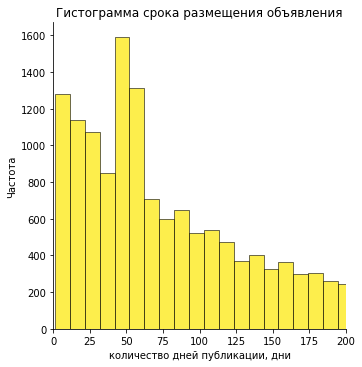

In [135]:
# построение гистограммы
_= sns.displot(x=good_data['days_exposition'], kde=False, bins=50, color='#fde910');
plt.xlim(0,200)
plt.title('Гистограмма срока размещения объявления')
_.set(xlabel='количество дней публикации, дни')
_ = plt.ylabel('Частота')

*Очистив данные от выбросов и построив заново гистограмму, можно все также отметить пики.  
Если бы не они, то график был бы похож на распределение Пуассона*

<div style="border:solid red 1px; padding: 20px"> 
    <b><i>Вывод:</i></b><br>
Ранее нами уже был изучен столбец days_exposition.<br>  
Тогда истограмма показала, что основная доля квартир продается за первые 80 дней, чем дольше срок объявления, тем меньше количество квартир. На гистограмме видим пик - 40 дней, и всплеск на 80 днях. То есть чаще всего квартиры продавались за 1.5-3мес.<br>  
Была выдвинута гипотеза, что два пика на гистограмме связаны с тем, что объявления автоматически снимаются через 80дн.<br>  
Необычно долгими оказались продажи дольше 512 дней (1.5г), они были отброшены.<br>  
Среднее было равно - 181 день<br>  
Медиана - 95 дней<br>  
Максимальный срок продажи - 1580дн (около 4 лет)<br>  
Минимальный срок - 1 день<br>  
После того, как выбросы были удалены, среднее равно - 124 дням, а медиана - 79 дням.
    </div>

### Задание 2. "Какие факторы больше всего влияют на общую (полную) стоимость объекта?"

In [136]:
good_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19152 entries, 0 to 19151
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   locality_name         19152 non-null  object        
 1   last_price            19152 non-null  int64         
 2   rooms                 19152 non-null  int64         
 3   total_area            19152 non-null  float64       
 4   living_area           19152 non-null  float64       
 5   kitchen_area          19152 non-null  float64       
 6   ceiling_height_m      19152 non-null  float64       
 7   floors_total          19152 non-null  int64         
 8   floor                 19152 non-null  int64         
 9   balcony               19152 non-null  int64         
 10  is_apartment          19152 non-null  bool          
 11  studio                19152 non-null  bool          
 12  open_plan             19152 non-null  bool          
 13  total_images    

In [137]:
# создание таблицы коэффициента Пирсона(таблица корреляции) 
corr = good_data[['last_price',\
                  'price_one_m',\
           'total_area',\
           'living_area',\
           'kitchen_area',\
           'rooms',\
           'ceiling_height_m',\
           'floor',\
            'week_day',\
           'month',\
           'year'    
               ]].corr()
corr.style.background_gradient(cmap='coolwarm')

,last_price,price_one_m,total_area,living_area,kitchen_area,rooms,ceiling_height_m,floor,week_day,month,year
last_price,1.000000,0.637443,0.679772,0.520556,0.453307,0.413664,0.297207,0.175544,-0.010141,0.004752,0.031637
price_one_m,0.637443,1.000000,-0.088042,-0.189787,0.199042,-0.238298,0.217560,0.267340,-0.008258,-0.005262,0.086002
total_area,0.679772,-0.088042,1.000000,0.891341,0.405225,0.799801,0.177167,-0.010227,-0.005820,0.011518,-0.038174
living_area,0.520556,-0.189787,0.891341,1.000000,0.113074,0.908479,0.051373,-0.130594,-0.000072,0.001441,-0.030100
kitchen_area,0.453307,0.199042,0.405225,0.113074,1.000000,0.030407,0.300697,0.228103,-0.006294,0.021179,-0.017973
rooms,0.413664,-0.238298,0.799801,0.908479,0.030407,1.000000,-0.051345,-0.167173,0.001432,0.000415,-0.018707
ceiling_height_m,0.297207,0.217560,0.177167,0.051373,0.300697,-0.051345,1.000000,0.128039,0.006123,0.006391,-0.047770
floor,0.175544,0.267340,-0.010227,-0.130594,0.228103,-0.167173,0.128039,1.000000,0.005891,0.019909,0.001974
week_day,-0.010141,-0.008258,-0.005820,-0.000072,-0.006294,0.001432,0.006123,0.005891,1.000000,0.013223,-0.008185
month,0.004752,-0.005262,0.011518,0.001441,0.021179,0.000415,0.006391,0.019909,0.013223,1.000000,-0.300968


*В таблице представлены коэффициенты Пирсона, обозначающие силу связи между признаками. Рассмотрим их поближе.    
Изучим от каких параметров сильнее всего зависит общая стоимость квартиры(чем выше коэффициент - тем выше зависимость):*  
* 0.68 - средняя сила корреляции с общей площадью квартиры
* 0.52 - средняя сила корреляции с жилой площадью квартиры
* 0.45 - умеренная сила корреляции с площадью кухни
* 0.41 - умеренная сила корреляции с количеством комнат
* 0.3  - слабая сила корреляции с высотой потолка
* 0.18 - очень слабая сила корреляции с этажом
* зависимость от дня недели, месяца, года практически отсутствует

0.6797722311731442

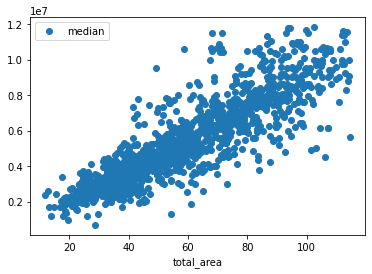

In [138]:
# построение диаграммы рассеяния(зависимость между ценой и общей площадью)
total_area_pivot_table_ = good_data.pivot_table(index = 'total_area', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
total_area_pivot_table_.columns = ['mean', 'count', 'median']
total_area_pivot_table_.plot(y = 'median', style = 'o')

total_area_pivot_table_.sort_values('median', ascending = False)

good_data['total_area'].corr(good_data['last_price'])


<AxesSubplot:xlabel='total_area', ylabel='last_price'>

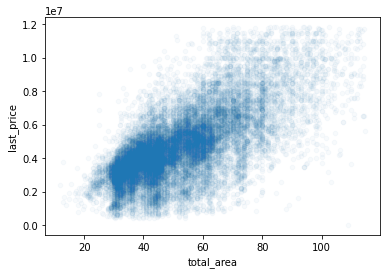

In [139]:
good_data.plot(x='total_area', y='last_price', kind='scatter', alpha=0.03)

0.5205564893277346

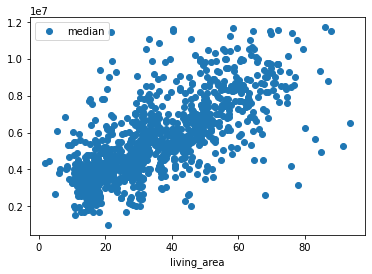

In [140]:
# построение диаграммы рассеяния(зависимость между ценой и жилой площадью)
living_area_pivot_table_ = good_data.pivot_table(index = 'living_area', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
living_area_pivot_table_.columns = ['mean', 'count', 'median']
living_area_pivot_table_.plot(y = 'median', style = 'o')

living_area_pivot_table_.sort_values('median', ascending = False)

good_data['living_area'].corr(good_data['last_price'])


<AxesSubplot:xlabel='living_area', ylabel='last_price'>

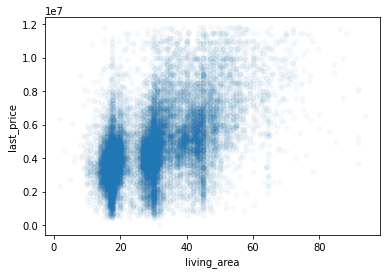

In [141]:
good_data.plot(x='living_area', y='last_price', kind='scatter', alpha=0.03)

0.4533074191091495

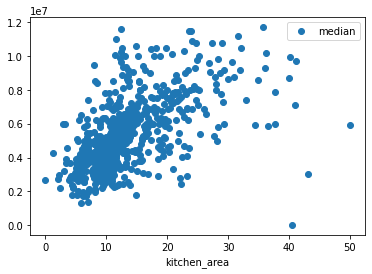

In [142]:
# построение диаграммы рассеяния(зависимость между ценой и площадью кухни)
kitchen_area_pivot_table_ = good_data.pivot_table(index = 'kitchen_area', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
kitchen_area_pivot_table_.columns = ['mean', 'count', 'median']
kitchen_area_pivot_table_.plot(y = 'median', style = 'o')

kitchen_area_pivot_table_.sort_values('median', ascending = False)

good_data['kitchen_area'].corr(good_data['last_price'])

*Рассмотрев три графика зависимости стоимости жилья от общей площади, жилой площади и площади кухни, следует отметить:*  
* сильнее всего цена квартиры зависит от общей площади объекта, это видно и из коэффициента корреляции(0.68) и из диаграммы рассеяния. Из-за сильной связи график стремится к воображаемой линии, но когда площадь квартиры достигает 60кв.м., влияние площади на цену начинает падать, так как точки на графике начинают приобретать более хаотичный порядок. 
* чуть меньше, но все еще значительно, на цену влияет размер жилой площади квартиры. это отражает коэффициент корреляции(0.52) и диаграмма рассеяния. График чуть более хаотичен, но стремится к воображаемой линии, пока жилая площадь не достигает 40кв.м., перейдя эту границу влияние жилой площади на цену начинает падать, и точки на графике расположены в хаотичном порядке.
* еще меньше отмечается связь между площадью кухни и стоимостью жилья, прослеживается умеренная связь. большое количество точек расположено хаотично, когда площадь кухни превышает 15кв.м. здесь связь между данными параметрами сниженается.

0.41366427705631553

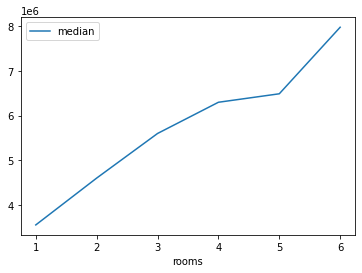

In [143]:
# построение диаграммы рассеяния(зависимость между ценой и количеством комнат)
rooms_pivot_table_ = good_data.pivot_table(index = 'rooms', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
rooms_pivot_table_.columns = ['mean', 'count', 'median']
rooms_pivot_table_.plot(y = 'median')

rooms_pivot_table_.sort_values('median', ascending = False)

good_data['rooms'].corr(good_data['last_price'])


*Явно прослеживается умеренная корреляция стоимости жилья от количества комнат. Чем больше комнат, тем выше стоимость жилья.  
Но в квартирах с 4-5 комнатами теснота связи снижается, то есть квартиры с 4-5 комнатами стоят примерно одинаково.  
Затем видим резкий скачок цен на квартиры с 6 комнатами.*

,mean,count,median
floor_type,,,
другой,4.893505e+06,14136,4500000
последний,4.247411e+06,2574,3900000
первый,3.964246e+06,2442,3700000


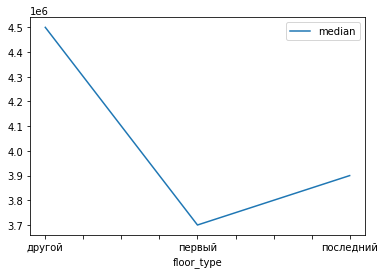

In [144]:
# построение диаграммы рассеяния(зависимость между ценой и типом этажа)
floor_type_pivot_table_ = good_data.pivot_table(index = 'floor_type', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
floor_type_pivot_table_.columns = ['mean', 'count', 'median']
floor_type_pivot_table_.plot(y = 'median')

floor_type_pivot_table_.sort_values('median', ascending = False)


*Явно видна зависимость типа этажа и стоимости квартиры.  
Дешевле всего стоят квартиры, расположенные на первом этаже, такие квартиры риелторы выделяют как самое непопулярное жилье. Средняя цена квартиры на первом этаже ниже, чем на любом другом(кроме последнего) на 17%. 
Можно выделить несколько причин. В основном это страхи и предрассудки покупателей - боязнь ограбления, повышенного уровня шума, необходимость занавешивать окна от посторонних глаз, деревья, близкое расположение подвалов(грызуны, сырость).  
На втором месте - квартиры на последних этажах. Здесь покупателей пугают возможные протечки крыши, сильный холод зимой и жара летом.*

0.2972070960726154

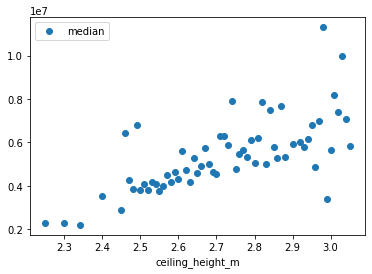

In [145]:
# построение диаграммы рассеяния(зависимость между ценой и высотой потолка)
ceiling_height_m_pivot_table_ = good_data.pivot_table(index = 'ceiling_height_m', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
ceiling_height_m_pivot_table_.columns = ['mean', 'count', 'median']
ceiling_height_m_pivot_table_.plot(y = 'median', style = 'o')

ceiling_height_m_pivot_table_.sort_values('median', ascending = False)

good_data['ceiling_height_m'].corr(good_data['last_price'])

*Зависимость цены от высоты потолка выражена слабо. Прослеживается зависимость цен при высоте потолка от 2.5 - 2.7м. Здесь цены имеют небольшую тенденцию к росту. Здесь график немного стремится к воображаемой линии, но выйдя за данный диапазон влияние высоты потолка на цену падает, так как точки на графике начинают приобретать хаотичный порядок. И чем выше потолок, тем меньше это влияет на цену.  
При высоте ниже/выше указанных цены на жилье определялись независимо от высоты потолка, здесь большая степень влияния была у других параметров.*

-0.010140839466032787

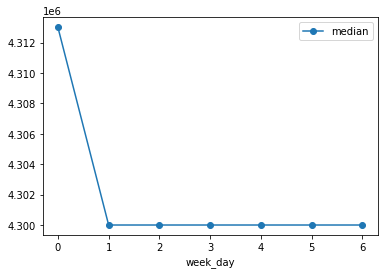

In [146]:
# построение диаграммы рассеяния(зависимость между ценой и днем недели)
week_day_pivot_table_ = good_data.pivot_table(index = 'week_day', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
week_day_pivot_table_.columns = ['mean', 'count', 'median']
week_day_pivot_table_.plot(y = 'median', style = 'o-')

week_day_pivot_table_.sort_values('median', ascending = False)

good_data['week_day'].corr(good_data['last_price'])


0.004752201547487532

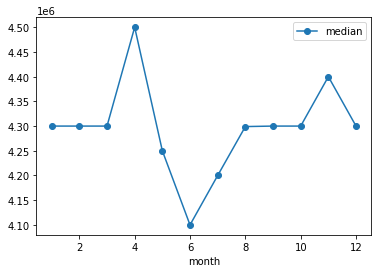

In [147]:
# построение диаграммы рассеяния(зависимость между ценой и месяцем)
month_pivot_table_ = good_data.pivot_table(index = 'month', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
month_pivot_table_.columns = ['mean', 'count', 'median']
month_pivot_table_.plot(y = 'median', style = 'o-')

month_pivot_table_.sort_values('median', ascending = False)

good_data['month'].corr(good_data['last_price'])


0.0316373537332618

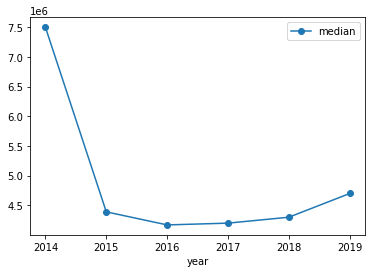

In [148]:
# построение диаграммы рассеяния(зависимость между ценой и годом)
year_pivot_table_ = good_data.pivot_table(index = 'year', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
year_pivot_table_.columns = ['mean', 'count', 'median']
year_pivot_table_.plot(y = 'median', style = 'o-')

year_pivot_table_.sort_values('median', ascending = False)

good_data['year'].corr(good_data['last_price'])


-0.038174122228423035

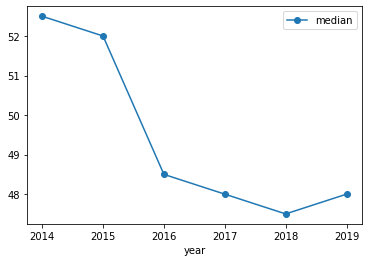

In [149]:
# построение диаграммы рассеяния(зависимость между площадью квартир и годом)
year_area_pivot_table_ = good_data.pivot_table(index = 'year', values = 'total_area', aggfunc = ['mean', 'count', 'median'])
year_area_pivot_table_.columns = ['mean', 'count', 'median']
year_area_pivot_table_.plot(y = 'median', style = 'o-')

year_area_pivot_table_.sort_values('median', ascending = False)

good_data['year'].corr(good_data['total_area'])


*Влияние даты размещения на стоимость:*
* стоимость квартиры от дня недели практически никак не зависит, но стоит отметить, что в среднем цены на квартиры, опубликованные в воскресенье, ниже, чем в другие дни, а затем, в понедельник, мы наблюдаем рост цен
* ранее была изучена корреляция числа объявлений от месяца, данные графики подтверждают эти гипотезы. апрель - середина весны, самый пик активности, наиболее "деловой" месяц. цены на квартиры в апреле оказались самыми высокими. в ноябре снова скачок активности на рынке недвижимости, "предновогодний" ажиотаж, цены снова растут перед тем, как упасть зимой. начиная с мая, цены идут на спад, самый невыгодный месяц - июнь, здесь цены оказались ниже всего
* интересный график корреляции цены на недвижимость и года.  В 2014 году наблюдается самая высокая средняя цена на квартиру - 7.5млн.руб., но уже в 2015г. отмечен резкий спад стоимости до 4.5млн.руб, на 40% снизилась средняя цена на квартиру. 
Поэтому было рассмотрено, как менялась площадь продаваемых квартир с течением времени, возможно, стали чаще продавать квартиры меньшей площадью, это и оказало влияние на цену.  
И действительно в среднем в 2014г. продавали квартиры площадью около 53кв.м, а в 2015г. площадь квартир на продажу становится меньше, в 2017г. - 48кв.м., это падение продолжается до 2018г. и достигает минимума. Затем вновь виден рост средней площади продаваемлй квартиры, так в 2019г. показатель вырос до уровня 2017г. 
На обоих графиках можно увидеть, что в 2019г. кривая графика пошла вверх, что подтверждает наше предположение.
Конечно, при падении значения средней площади продаваемых квартир снизится и средняя стоимость квартиры.  
Мы видим отрицательную корреляцию площади от года. То есть годы шли, а площадь падала.* 

<div style="border:solid red 1px; padding: 20px"> 
    <b><i>Вывод:</i></b><br>
Выделим факторы, которые больше всего влияют на общую цену объекта(по уменьшению степени влияния):
    <li>Сильнее всего на стоимость объекта влияет его общая площадь. Чем больше метраж, тем выше цена квартиры</li>
    <li>Достаточное влияние имеют жилая площадь и площадь кухни. Чем выше их доля, тем выше стоимость.</li>
    <li>Количество комнат: чем больше комнат в квартире, тем дороже квартира. </li>
    <li>Тип этажа имеет тесную связь с ценой на объект недвижимости. На первом этаже - самые дешевые квартиры, на последнем этаже - дороже, но дешевле, чем на других этажах.</li>
    <li>Высота потолка слабо влияет на стоимость жилья, небольшая связь прослеживается в квартирах с высотой потолков в пределах 2.5-2.7м. Здесь был отмечен рост стоимости цены с ростом высоты потолка.</li>
    <li>День размещения объявления незначительно, но влияет на стоимость объекта недвижимости. В выходные дни цены ниже, чем в будние дни.</li>
    <li>Дороже всего размещены квартиры весной(апрель) и осенью(ноябрь). Дешевле всего - в летний период. Самый провальный месяц - июнь.</li>
    <li>В период 2014-2019гг. резкое падение стоимости жилья оказалось связано с тем, что площадь продаваемых квартир стала гораздо ниже. С 2014 по 2017гг. средняя цена упала на 42,7%, а средняя площадь - на 9.4%. В 2019г. вместе с увеличением площади квартир отмечается также рост и цен на жилье.</li> 
</div>    

### Задание 3. "Посчитайте среднюю цену 1кв.м. в 10 населённых пунктах с наибольшим числом объявлений"

In [150]:
# вывод 10 населенных пунктов с наибольшим числом объявлений
top_total_area = good_data.pivot_table(index='locality_name', values='total_area', aggfunc='count')
top_total_area.columns = ['count']
top_total_area.sort_values(by='count', ascending=False)[:10]

,count
locality_name,
санкт-петербург,11983
мурино,547
кудрово,421
посёлок шушары,415
всеволожск,359
колпино,311
посёлок парголово,309
пушкин,298
гатчина,275


In [151]:
# рассчет средней цены 1кв.м в зависимости от населенного пункта
price_one_m_pivot = good_data.pivot_table(index='locality_name', values='price_one_m')

# переименование столбца
price_one_m_pivot.columns = ['mean']

In [152]:
# группировка двух сводных таблиц: населенные пункты с наибольшим числом объявлений и средняя цена одного кв.м
top_area_price = top_total_area.merge(price_one_m_pivot, on='locality_name')

# сортировка по уменьшению числа объявлений в населенном пункте и сохранение сортировки
top_area_price.sort_values(by='count', ascending=False, inplace=True)
top_area_price[0:10]

,count,mean
locality_name,,
санкт-петербург,11983,105299.251616
мурино,547,86103.710329
кудрово,421,95262.015867
посёлок шушары,415,78492.232169
всеволожск,359,67070.053008
колпино,311,75168.179293
посёлок парголово,309,90068.330777
пушкин,298,99838.686577
гатчина,275,68775.351127


In [153]:
data.groupby('locality_name').agg({'balcony':'count', 'last_price':'median'}) \
    .sort_values(by = 'balcony', ascending = False) \
    .head(10)

,balcony,last_price
locality_name,,
санкт-петербург,15623,5500000.0
мурино,579,3400000.0
кудрово,458,3900000.0
посёлок шушары,439,3950000.0
всеволожск,398,3450000.0
пушкин,369,5180000.0
колпино,338,3600000.0
посёлок парголово,324,4135000.0
гатчина,307,3100000.0


In [154]:
# срез топ 10 населенных пунктов по числу объявлений
# и группировка таблицы по уменьшению цены за 1 кв.м
top_area_price.loc[top_area_price['count']>=196].sort_values(by='mean', ascending=False)

,count,mean
locality_name,,
санкт-петербург,11983,105299.251616
пушкин,298,99838.686577
кудрово,421,95262.015867
посёлок парголово,309,90068.330777
мурино,547,86103.710329
посёлок шушары,415,78492.232169
колпино,311,75168.179293
гатчина,275,68775.351127
всеволожск,359,67070.053008


<div style="border:solid red 1px; padding: 20px"> 
    <b><i>Вывод:</i></b><br>
Как и следовало ожидать, наибольшее число объъявлений - о продаже квартир в Санкт-Петербурге. Также в Санкт-Петербурге 1кв.м. стоит дороже всего - 105 365.51руб. 
Закрывает топ-10 населенных пунктов по числу объявлений - Выборг, там же самая низкая стоимость квадратного метра среди среза этих строк - 58 029.73руб.<br>
Наибольшее число объявлений в этих 10 населенных пунктах связано с численностью населения в них, это наиболее крупные административные единицы среды выборки, соответственно, там численность больше, больше объектов недвижимости для продажи. Также люди из Ленинградской области зачастую стараются переезжать в Санкт-Петербург, поэтому продают свою недвижимость.<br>
Пушкин стоит на втором месте за стоимости 1кв.м., этот город имеет много достопримечательной. Это город-музей, который находится под охраной Всемирного наследия ЮНЕСКО. Здесь собрано около 100 памятников культуры на небольшой площади. Это влияет на стоимость жилья.<br>
Парголово находится в пределах КАД, что влияет на стоимость, несмотря на удаленность от центра. Мурино находится за КАДом и считается областью, но там идет активное строительство объектов недвижимости и развитие инфраструктуры, а также открытие станции метро, которая связала этот поселок с городом, конечно, увеличило стоимость жилья.<br>
 Наименьшая цена за 1кв.м. в Выборге связана с его удаленностью от Санкт-Петербурга. Он находится на расстоянии около 135км, это самое большое расстояние из всех населенных пунктов, представленных здесь. Например, Кудрово - 14км от СпБ, Колпино - 43км от СпБ, Гатчина - 48км от СпБ, Всеволожск - 49км от СпБ. При этом мы видим тенденцию к уменьшению цены 1кв.м. Значит, близость к Санкт-Петербургу может влиять на стоимость одного квадратного метра.<br>
</div>

### Задание 4. "Как стоимость объектов зависит от расстояния до центра Санкт-Петербурга?"

In [155]:
# создание таблицы по квартирам только в Санкт-Петербурге, где нет пропусков в столбце city_сenter_km
spb = good_data.query('locality_name == "санкт-петербург" and city_сenter_km.notna()')
spb.head()

,locality_name,last_price,rooms,total_area,living_area,kitchen_area,ceiling_height_m,floors_total,floor,balcony,...,price_high,area_high,ceiling_categor,days_categor,price_one_m,week_day,month,year,floor_type,city_сenter_km
1,санкт-петербург,10000000,2,100.0,32.0,41.0,3.03,14,13,0,...,10000000,100.0,3.03,121.0,100000.00,1,6,2018,другой,8.0
4,санкт-петербург,7915000,2,71.6,31.0,18.9,2.75,24,22,2,...,7915000,71.6,2.75,NaN,110544.69,3,4,2019,другой,12.0
6,санкт-петербург,5400000,3,61.0,43.6,6.5,2.50,9,7,2,...,5400000,61.0,2.5,289.0,88524.59,6,2,2017,другой,15.0
7,санкт-петербург,5050000,1,39.6,20.3,8.5,2.67,12,3,0,...,5050000,39.6,2.67,137.0,127525.25,3,11,2017,другой,14.0
12,санкт-петербург,4650000,1,39.0,20.5,7.6,2.60,14,5,1,...,4650000,39.0,2.6,19.0,119230.77,5,11,2017,другой,14.0


In [156]:
# создание сводной таблицы со средней ценой и стоимостью 1кв.м. каждого км
spb_pivot = spb.pivot_table(index='city_сenter_km', values=['last_price', 'price_one_m'], aggfunc='median')
spb_pivot.head(20)

,last_price,price_one_m
city_сenter_km,,
0.0,6900000,108163.270
1.0,7985000,112127.660
2.0,7950000,110843.370
3.0,7100000,106783.920
4.0,7040000,112468.060
5.0,7200000,121527.780
6.0,6650000,118918.920
7.0,6175000,114984.315
8.0,5995000,110459.780


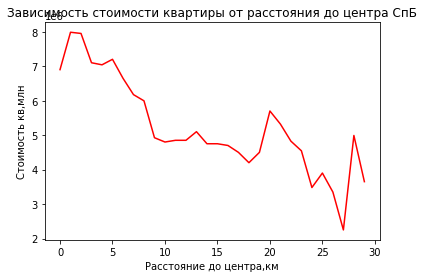

In [157]:
# построение линейного графика зависимости расстояния до центра и средней стоимостью квартиры
sns.lineplot(x = spb_pivot.index, y = 'last_price', data = spb_pivot, color='red')
plt.xlabel('Расстояние до центра,км')
plt.ylabel('Стоимость кв,млн')
plt.title('Зависимость стоимости квартиры от расстояния до центра СпБ')
plt.show()

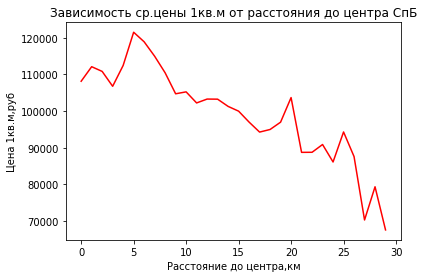

In [158]:
# построение линейного графика зависимости расстояния до центра и средней ценой 1кв.м
sns.lineplot(x = spb_pivot.index, y = 'price_one_m', data = spb_pivot, color='red')
plt.xlabel('Расстояние до центра,км')
plt.ylabel('Цена 1кв.м,руб')
plt.title('Зависимость ср.цены 1кв.м от расстояния до центра СпБ')
plt.show()

In [159]:
# рассчет коэффициента Пирсона
corr_spb = good_data[['last_price',\
                  'price_one_m',\
                  'city_сenter_km'
               ]].corr()
corr_spb.style.background_gradient(cmap='coolwarm')

,last_price,price_one_m,city_сenter_km
last_price,1.000000,0.637443,-0.309129
price_one_m,0.637443,1.000000,-0.394596
city_сenter_km,-0.309129,-0.394596,1.000000


<AxesSubplot:xlabel='city_сenter_m', ylabel='price_one_m'>

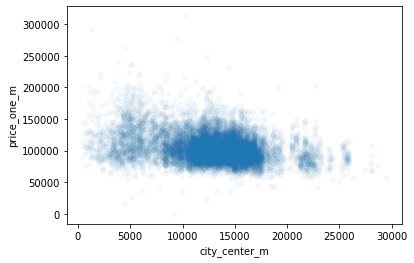

In [160]:
spb.plot(x='city_сenter_m', y='price_one_m', kind='scatter',  alpha=0.03)

<div style="border:solid red 1px; padding: 20px"> 
    <b><i>Вывод:</i></b><br>
    Проанализировав графики, сделан вывод, что условный <b>центр Санкт-Петербурга находится в радиусе 5км</b>.
    Выявлена зависимость стоимости квартиры от удаленности от центра города. Чем дальше от центра, тем в среднем квартира будет иметь более низкую стоимость. Имеет место отрицательная корреляционная зависимость. Коэффициент Пирсона показывает наличие умеренной зависимости, причем влияние расстояния на стоимость 1кв.м. выше, чем на общую стоимость. <br>  
    Сильнее всего влияние расстояния на цену отмечено в пределах первых 5км от центра, это видно и в сводной таблице, и на линейном графике и на диаграмме рассеяния. Здесь 1км. снижает стоимость 1кв.м. на 4%.<br>  
    В пределах 10км от центра 1км. снижает цену 1кв.м. на 2.3%.<br>  
    На расстоянии 15км. - на 1.94%.<br>  
    Конечно, влияние близости к центру на стоимость квартиры есть, но степень влияния снижается при увеличении этого расстояния, то есть сила корреляции будет снижаться. Скорее всего, на расстоянии свыше 15км. большее влияние на цену приобретают другие факторы. <br>   
    </div>

## Общий вывод


<p></p>

<div style="border:solid pink 5px; padding: 20px">
    Итак, нами был получен и изучен архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и ЛО. Прежде чем дать ответ на поставленные перед нами вопросы, был проведен ряд манипуляций с данными.<br>  
    Таблица с объектами недвижимости была очищена от дубликатов, обработаны пропущенные значения в некоторых столбцах, данные приведены к корректному типу.<br>   
    Параметры квартир были изучены на предмет наличия аномалий и выбросов(редкие и выбивающиеся значения). Объекты, которые сильно искажали выборку, были устранены, чтобы повысить точность дальнейших исследований. Здесь следует дать рекомендацию: на сервисе стоит внедрить ограничения на значения вводимых данных, таких как высота потолков (в данных есть значение - 100м и 1м).<br>  
    Также некоторые поля для заполнения стоит сделать обязательными, без которых объявление не будет размещено, это позволит сократить количество пропусков. Такими параметрами можно сделать: имя населенного пункта, общая площадь квартиры, количество комнат.<br>
    Еще одной рекомендацией будет более внимательное изучение срока продажи части квартир. В данных присутствуют объекты, проданные за пару дней. Следует выяснить причину такой быстрой продажи: мошеннические действия, продавца что-то не устроило на сервисе, или наоборот, что помогло так быстро продать объект. Также есть квартиры, которые размещены на сервисе около 4 лет. Нужно выяснить действительно ли квартиру не могут продать в течение такого срока, если да, то узнать причину и, возможно, внедрить подсказки для продавцов для совершения удачной сделки. Если квартира давно продана, тогда необходимо разработать и внедрить алгоритм, который будет автоматически снимать объявления по истечении определенного срока давности. Конечно, если такой алгоритм уже внедрен, тогда исследовать такие объекты отдельно, возможно, это внутренний сбой/ошибка.<br>   
    Средняя квартира, которую чаще всего можно встретить на продаже, это квартира:<br> 
<li>общей площадью около 35-40кв.м</li>
<li>стоимостью 3.5-4млн.руб.</li>
<li>с 1-2 комнатами</li>
<li>с потолками 2.5-2.75м</li>
<li>на 1-3 этажах</li>
<li>в 5 или 9-этажных домах</li>
<li>в весенний или осенний период</li>
    Был исследован срок продажи квартир. Основная доля объектов недвижимости продается за первые 40 дней. Чаще всего квартиры продавались в течение 1.5-3месяцев.<br> 
    Для определения рыночной стоимости объектов недвижимости важны прежде всего следующие параметры:<br> 
<li>общая площадь </li>
<li>число комнат </li>
<li>этаж квартиры(люди все также стараются избегать первый и последний этаж)</li>
<li>расстояние от центра города(чем ближе к центру тем выше стоимость)</li>
    Выделим топ 3 населенного пункта с количеством объявлений о продаже и стоимости 1кв.м.<br>  
    Больше всего объявлений размещено в: Санкт-Петербурге, Мурино, Кудрово.<br> 
    Больше всего покупатель отдаст денег за 1кв.м7, покупая квартиру в: Санкт-Петербурге, Пушкине, Кудрово.<br> 
    Центр Санкт-Петербурга ограничен кольцом с радиусом примерно 5км. Влияние расстояния до центра города на стоимость 1кв.м. квартиры умеренное. Первые 10км от центра стоимость 1кв.м резко снижается и каждый км. имеет большо вес, но по мере увеличения расстояния это влияние ослабевает, и каждый дополнительный километр будет падать в цене, то есть его влияние на стоимость квартиры будет все меньше.<br> 
   По результатам исследования нами были достигнуты поставленные цели, решены задачи, сделаны выводы и выдвинуты рекомендации.<br> 
</div>